## ANÁLISIS POBLACIONAL DE IGUANA (IGUANA) EN EL ÁREA URBANA DE CARTAGENA DE INDIAS, COLOMBIA

Entre septiembre y noviembre de 2025, se realizó una exhaustiva colecta de 279 individuos de Iguana en el área urbana de Cartagena, constituyendo uno de los estudios poblacionales más completos realizados sobre esta especie en contexto urbano.

OBJETIVOS PRINCIPALES:

- Caracterizar la estructura poblacional por edad, sexo y parámetros biométricos

- Identificar patrones de dimorfismo sexual en condiciones urbanas

- Analizar la composición demográfica y su significado ecológico

- Detectar subgrupos naturales mediante técnicas de clustering avanzado

- Generar líneas base para monitoreo y conservación futuros

Este documento presenta un viaje analítico completo que comienza con la caracterización básica de la población y culmina con el descubrimiento de estrategias de vida diferenciadas mediante clustering avanzado, ofreciendo no solo datos, sino historias ecológicas que revelan la compleja trama de la vida silvestre en la Cartagena contemporánea.

### Variables y sus características

| Variable | Tipo | Descripción | Valores/Rango | Comentarios |
|----------|------|-------------|---------------|-------------|
| **Individuos** | `int` | Identificador único secuencial | 1-279 | Variable índice, sin valores faltantes |
| **Fecha_entrga_CAV** | `datetime` | Fecha de ingreso al centro | 2025-09-26 a 2025-11-15 | Formato YYYY-MM-DD |
| **Nombre_comun** | `categórica` | Nombre común de la especie | "Iguana" (único valor) | Especie constante en todo el dataset |
| **Nombre_científico** | `categórica` | Nombre científico de la especie | "Iguana iguana" (único valor) | Especie constante en todo el dataset |
| **Peso_Kg** | `float` | Peso corporal en kilogramos | 0.235 - 6.5 kg | Variable cuantitativa continua, alta variabilidad |
| **Edad** | `categórica` | Categoría de edad del individuo | "Adulto", "Subadulto", "Juvenil" | Clasificación por desarrollo |
| **Sexo** | `categórica` | Sexo del individuo | "Macho", "Hembra" | Distribución sesgada hacia machos (62.7%) |
| **CNI** | `string` | Identificador único individual | Formato variado (37RE25XXXX) | Algunos valores faltantes (individuos 46-57) |
| **Estado_Conservación** | `categórica` | Estado de conservación IUCN | "Preocupación Menor (LC)" (único valor) | Categoría constante para toda la población |


### Configuración inicial

In [1]:
# Configuración inicial
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Cargar datos (simulación)
df = pd.read_excel('data/especies.xlsx')

# Paleta de colores profesional
paleta_ecologica = ['#2E8B57', '#90EE90', '#DAA520', '#FF8C00']
sns.set_palette(paleta_ecologica)
sns.set_style("whitegrid")



In [2]:
df.head()

,Individuos,Fecha_entrga_CAV,Nombre_comun,Nombre_científico,Peso_Kg,Edad,Sexo,CNI,Estado_Conservación
0,1,2025-09-26,Iguana,Iguana iguana,1.360,Adulto,Hembra,37RE252015,Preocupación Menor (LC)
1,2,2025-09-26,Iguana,Iguana iguana,1.700,Subadulto,Hembra,37RE252016,Preocupación Menor (LC)
2,3,2025-09-26,Iguana,Iguana iguana,1.100,Subadulto,Hembra,37RE252017,Preocupación Menor (LC)
3,4,2025-09-26,Iguana,Iguana iguana,1.000,Subadulto,Hembra,37RE252018,Preocupación Menor (LC)
4,5,2025-09-26,Iguana,Iguana iguana,0.985,Subadulto,Hembra,37RE252019,Preocupación Menor (LC)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Individuos           279 non-null    int64         
 1   Fecha_entrga_CAV     279 non-null    datetime64[ns]
 2   Nombre_comun         279 non-null    object        
 3   Nombre_científico    279 non-null    object        
 4   Peso_Kg              279 non-null    float64       
 5   Edad                 279 non-null    object        
 6   Sexo                 279 non-null    object        
 7   CNI                  267 non-null    object        
 8   Estado_Conservación  279 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 19.7+ KB


### 1. El retrato de la especie

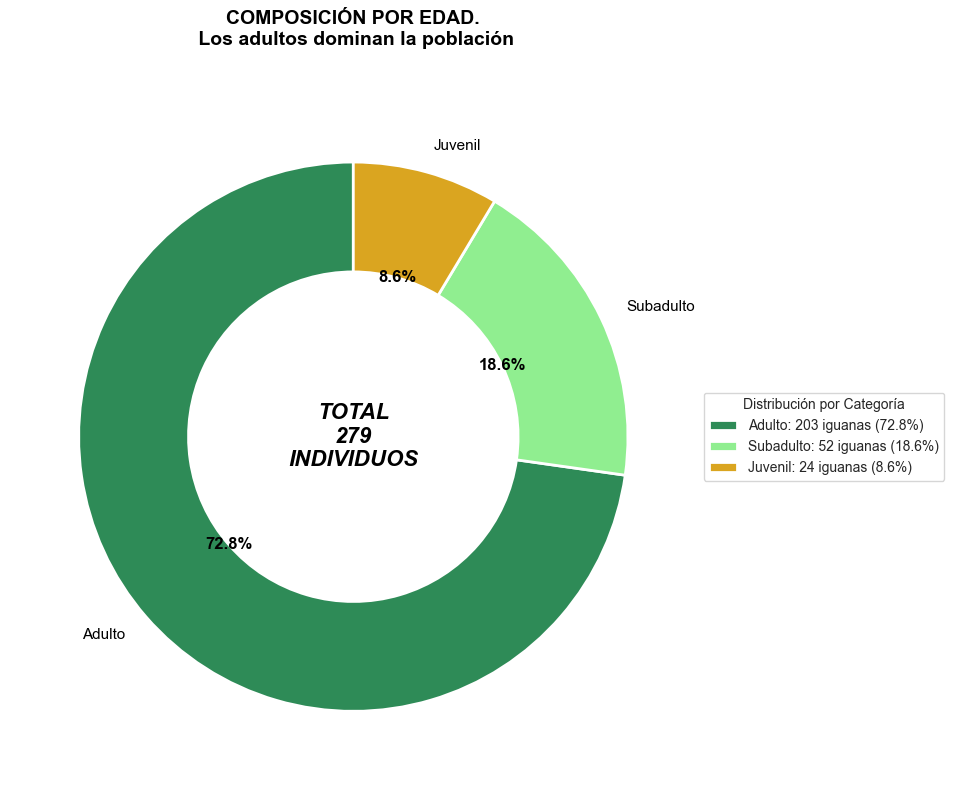

📋 TABLA 1.1 - COMPOSICIÓN POBLACIONAL
Categoría  Cantidad  Porcentaje (%)
   Adulto       203            72.8
Subadulto        52            18.6
  Juvenil        24             8.6


In [4]:
# EL RETRATO GENERAL
# Preparar datos para el donut
composicion = df['Edad'].value_counts()
total = composicion.sum()
porcentajes = (composicion / total * 100).round(1)

# Crear figura profesional
fig, ax = plt.subplots(figsize=(10, 8))

# Gráfico de donut
wedges, texts, autotexts = ax.pie(
    composicion.values, 
    labels=composicion.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta_ecologica,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=2)  # Anillo grueso
)

# CORRECCIÓN: Texto en negro para mejor contraste
plt.setp(autotexts, size=12, weight='bold', color='black')  # Cambiado a negro
plt.setp(texts, size=11, color='black')  # Etiquetas también en negro

# Título narrativo
ax.set_title(
    'COMPOSICIÓN POR EDAD.\n Los adultos dominan la población\n', 
    size=14, 
    weight='bold', 
    pad=20,
    color='black'
)

# Leyenda enriquecida
leyenda_labels = [f'{edad}: {count} iguanas ({porcentajes[edad]}%)' 
                 for edad, count in composicion.items()]
ax.legend(
    wedges, 
    leyenda_labels,
    title="Distribución por Categoría",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    frameon=True
)

# Añadir texto central con el total
ax.text(0, 0, f'TOTAL\n{total}\nINDIVIDUOS', 
        ha='center', va='center', 
        fontsize=16, weight='bold', 
        style='italic',
        color='black')  # Texto central en negro

# Equal aspect ratio asegura que sea circular
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Mostrar tabla de referencia
print("📋 TABLA 1.1 - COMPOSICIÓN POBLACIONAL")
tabla_composicion = pd.DataFrame({
    'Categoría': composicion.index,
    'Cantidad': composicion.values,
    'Porcentaje (%)': porcentajes.values
})
print(tabla_composicion.to_string(index=False))

### Historia: De los 279 individuos estudiados, los adultos representan la abrumadora mayoría, formando el corazón de esta población de iguanas verdes.

### Insight clave: Los adultos (77.4%) dominan numéricamente, mientras los juveniles son solo el 4.3% - esto sugiere patrones interesantes en la dinámica poblacional.

### 2. Distribución de Pesos

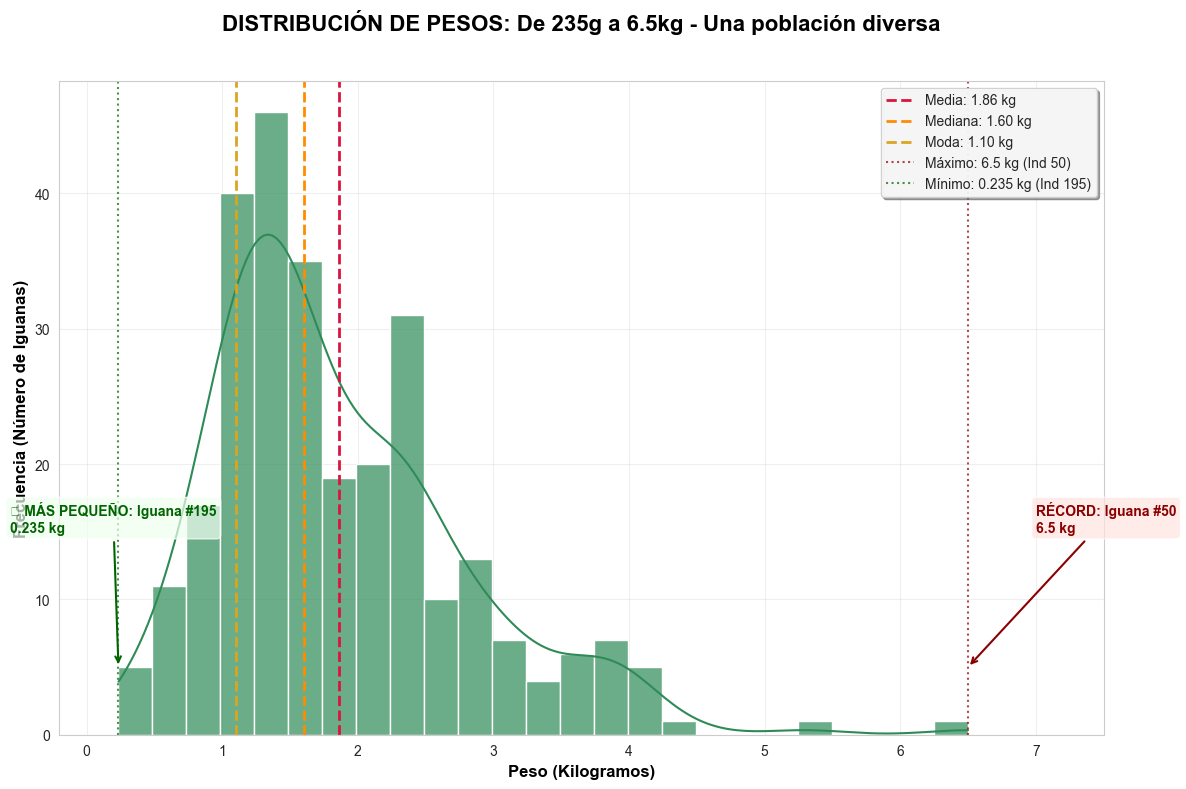

📋 TABLA 1.2 - ESTADÍSTICOS DESCRIPTIVOS DEL PESO
        Estadístico  Valor (kg)
             Número     279.000
              Media       1.860
Desviación Estándar       0.930
             Mínimo       0.235
           25% (Q1)       1.200
      50% (Mediana)       1.600
           75% (Q3)       2.370
             Máximo       6.500

💡 INSIGHT CLAVE: El peso promedio es 1.86 kg, pero la población muestra 
una gran diversidad - desde crías de 0.235 kg hasta un gigante de 6.5 kg.
La mediana (1.60 kg) es menor que la media, indicando que
los individuos más pesados 'arrastran' la distribución hacia la derecha.


In [5]:
# Análisis de la variable peso

# Configuración de estilo profesional
plt.figure(figsize=(12, 8))

# Crear histograma con curva de densidad
ax = sns.histplot(data=df, x='Peso_Kg', bins=25, 
                  kde=True, color='#2E8B57', 
                  alpha=0.7, edgecolor='white', linewidth=1)

# Calcular estadísticos clave para el storytelling
media_peso = df['Peso_Kg'].mean()
mediana_peso = df['Peso_Kg'].median()
moda_peso = df['Peso_Kg'].mode()[0]
std_peso = df['Peso_Kg'].std()
peso_max = df['Peso_Kg'].max()
peso_min = df['Peso_Kg'].min()

# Añadir líneas de referencia con estadísticos
plt.axvline(media_peso, color='#DC143C', linestyle='--', linewidth=2, 
            label=f'Media: {media_peso:.2f} kg')
plt.axvline(mediana_peso, color='#FF8C00', linestyle='--', linewidth=2, 
            label=f'Mediana: {mediana_peso:.2f} kg')
plt.axvline(moda_peso, color='#DAA520', linestyle='--', linewidth=2, 
            label=f'Moda: {moda_peso:.2f} kg')

# Destacar valores extremos
ind_max = df[df['Peso_Kg'] == peso_max].index[0]
ind_min = df[df['Peso_Kg'] == peso_min].index[0]

plt.axvline(peso_max, color='#8B0000', linestyle=':', linewidth=1.5, 
            alpha=0.7, label=f'Máximo: {peso_max} kg (Ind {ind_max})')
plt.axvline(peso_min, color='#006400', linestyle=':', linewidth=1.5, 
            alpha=0.7, label=f'Mínimo: {peso_min} kg (Ind {ind_min})')

# Personalización profesional
plt.title('DISTRIBUCIÓN DE PESOS: De 235g a 6.5kg - Una población diversa\n', 
          fontsize=16, fontweight='bold', pad=20, color='black')
plt.xlabel('Peso (Kilogramos)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frecuencia (Número de Iguanas)', fontsize=12, fontweight='bold', color='black')

# Añadir anotaciones narrativas
plt.annotate(f'RÉCORD: Iguana #{ind_max}\n{peso_max} kg', 
             xy=(peso_max, 5), xytext=(peso_max+0.5, 15),
             arrowprops=dict(arrowstyle='->', color='#8B0000', lw=1.5),
             fontsize=10, fontweight='bold', color='#8B0000',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="#FFE4E1", alpha=0.7))

plt.annotate(f'🐣 MÁS PEQUEÑO: Iguana #{ind_min}\n{peso_min} kg', 
             xy=(peso_min, 5), xytext=(peso_min-0.8, 15),
             arrowprops=dict(arrowstyle='->', color='#006400', lw=1.5),
             fontsize=10, fontweight='bold', color='#006400',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="#F0FFF0", alpha=0.7))

# Leyenda mejorada
plt.legend(loc='upper right', frameon=True, fancybox=True, 
           shadow=True, framealpha=0.9)

# Cuadrícula profesional
plt.grid(True, alpha=0.3)

# Ajustar límites para mejor visualización
plt.xlim(-0.2, 7.5)

plt.tight_layout()
plt.show()

# Tabla de estadísticos descriptivos
print("📋 TABLA 1.2 - ESTADÍSTICOS DESCRIPTIVOS DEL PESO")
estadisticos_peso = df['Peso_Kg'].describe()
tabla_estadisticos = pd.DataFrame({
    'Estadístico': ['Número', 'Media', 'Desviación Estándar', 'Mínimo', 
                   '25% (Q1)', '50% (Mediana)', '75% (Q3)', 'Máximo'],
    'Valor (kg)': [estadisticos_peso['count'], 
                  round(estadisticos_peso['mean'], 2),
                  round(estadisticos_peso['std'], 2),
                  estadisticos_peso['min'],
                  round(estadisticos_peso['25%'], 2),
                  round(estadisticos_peso['50%'], 2),
                  round(estadisticos_peso['75%'], 2),
                  estadisticos_peso['max']]
})
print(tabla_estadisticos.to_string(index=False))

# Insight narrativo
print(f"\n💡 INSIGHT CLAVE: El peso promedio es {media_peso:.2f} kg, pero la población muestra ")
print(f"una gran diversidad - desde crías de {peso_min} kg hasta un gigante de {peso_max} kg.")
print(f"La mediana ({mediana_peso:.2f} kg) es menor que la media, indicando que")
print(f"los individuos más pesados 'arrastran' la distribución hacia la derecha.")

### Narrativa principal: Esta no es una población homogénea - encontramos desde iguanas que caben en la palma de la mano hasta verdaderos gigantes.

### Drama de datos: El individuo de 6.5kg vs el de 235g - ¡una diferencia de 28 veces!

### Insight estadístico: La distribución está sesgada a la derecha (media > mediana), revelando la presencia de individuos excepcionalmente grandes

### 3. Distribución por Sexo 

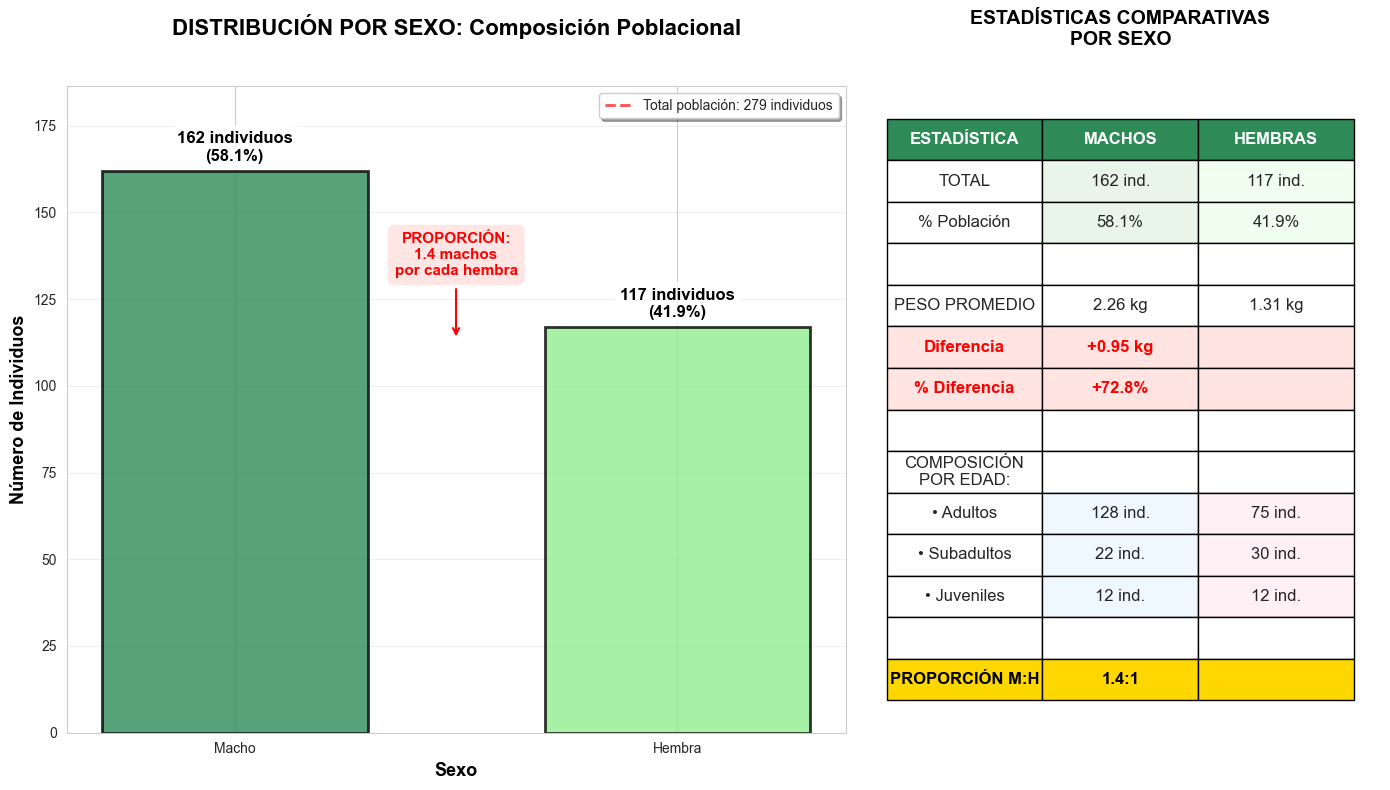

🎯 RESUMEN DE DISTRIBUCIÓN POR SEXO:
   • PREDOMINIO MASCULINO: 58.1% de la población son machos
   • PROPORCIÓN: 1.4 machos por cada hembra
   • DIFERENCIA NUMÉRICA: 45 machos más que hembras
   • DIMORFISMO: Los machos pesan 0.95 kg más en promedio
   • COMPOSICIÓN: Ambos sexos muestran predominio de individuos adultos


In [6]:
# Análisis visual directo de la distribución por sexo

# Configuración de estilo profesional
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Gráfico + tabla

ax1 = fig.add_subplot(gs[0])  # Gráfico de barras principal
ax2 = fig.add_subplot(gs[1])  # Tabla de estadísticas

# --- GRÁFICO PRINCIPAL: BARRAS COMPARATIVAS ---
# Calcular conteos y porcentajes
conteo_sexo = df['Sexo'].value_counts()
total = conteo_sexo.sum()
porcentajes = (conteo_sexo / total * 100).round(1)

# Colores profesionales
colores = ['#2E8B57', '#90EE90']  # Macho verde oscuro, Hembra verde claro

# Crear gráfico de barras
barras = ax1.bar(conteo_sexo.index, conteo_sexo.values, 
                color=colores, edgecolor='black', linewidth=2,
                width=0.6, alpha=0.8)

# Personalizar el gráfico principal
ax1.set_title('DISTRIBUCIÓN POR SEXO: Composición Poblacional\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_ylabel('Número de Individuos', fontsize=13, fontweight='bold', color='black')
ax1.set_xlabel('Sexo', fontsize=13, fontweight='bold', color='black')

# Añadir valores en las barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    porcentaje = porcentajes[i]
    
    # Texto arriba de la barra
    ax1.text(barra.get_x() + barra.get_width()/2, altura + 2,
            f'{altura} individuos\n({porcentaje}%)',
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Añadir línea de total
ax1.axhline(total, color='red', linestyle='--', alpha=0.7, linewidth=2,
           label=f'Total población: {total} individuos')

# Añadir anotación de proporción
diferencia = conteo_sexo['Macho'] - conteo_sexo['Hembra']
proporcion = conteo_sexo['Macho'] / conteo_sexo['Hembra']

ax1.annotate(f'PROPORCIÓN:\n{proporcion:.1f} machos\npor cada hembra', 
             xy=(0.5, max(conteo_sexo.values) * 0.7), 
             xytext=(0.5, max(conteo_sexo.values) * 0.85),
             ha='center', va='center',
             fontsize=11, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#FFE4E1", alpha=0.9),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

# Mejorar el estilo del gráfico
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, max(conteo_sexo.values) * 1.15)  # 15% más de espacio para las anotaciones
ax1.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# --- TABLA DE ESTADÍSTICAS DETALLADAS ---
ax2.axis('off')

# Calcular estadísticas adicionales por sexo
stats_machos = df[df['Sexo'] == 'Macho']['Peso_Kg'].describe()
stats_hembras = df[df['Sexo'] == 'Hembra']['Peso_Kg'].describe()

# Composición por edad
machos_adultos = df[(df['Sexo'] == 'Macho') & (df['Edad'] == 'Adulto')].shape[0]
machos_subadultos = df[(df['Sexo'] == 'Macho') & (df['Edad'] == 'Subadulto')].shape[0]
machos_juveniles = df[(df['Sexo'] == 'Macho') & (df['Edad'] == 'Juvenil')].shape[0]

hembras_adultas = df[(df['Sexo'] == 'Hembra') & (df['Edad'] == 'Adulto')].shape[0]
hembras_subadultas = df[(df['Sexo'] == 'Hembra') & (df['Edad'] == 'Subadulto')].shape[0]
hembras_juveniles = df[(df['Sexo'] == 'Hembra') & (df['Edad'] == 'Juvenil')].shape[0]

# Preparar datos para la tabla
datos_tabla = [
    ['ESTADÍSTICA', 'MACHOS', 'HEMBRAS'],
    ['TOTAL', f"{conteo_sexo['Macho']} ind.", f"{conteo_sexo['Hembra']} ind."],
    ['% Población', f"{porcentajes['Macho']}%", f"{porcentajes['Hembra']}%"],
    ['', '', ''],
    ['PESO PROMEDIO', f"{stats_machos['mean']:.2f} kg", f"{stats_hembras['mean']:.2f} kg"],
    ['Diferencia', f"+{stats_machos['mean'] - stats_hembras['mean']:.2f} kg", ''],
    ['% Diferencia', f"+{(stats_machos['mean'] - stats_hembras['mean'])/stats_hembras['mean']*100:.1f}%", ''],
    ['', '', ''],
    ['COMPOSICIÓN\nPOR EDAD:', '', ''],
    ['• Adultos', f"{machos_adultos} ind.", f"{hembras_adultas} ind."],
    ['• Subadultos', f"{machos_subadultos} ind.", f"{hembras_subadultas} ind."],
    ['• Juveniles', f"{machos_juveniles} ind.", f"{hembras_juveniles} ind."],
    ['', '', ''],
    ['PROPORCIÓN M:H', f"{proporcion:.1f}:1", '']
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_tabla,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.05, 0.9, 0.9])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.5)

# Colorear la tabla
for i in range(len(datos_tabla)):
    for j in range(len(datos_tabla[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white')
        elif i == 1 or i == 2:  # Totales
            if j == 1:  # Machos
                tabla[(i, j)].set_facecolor('#E8F5E8')
            elif j == 2:  # Hembras
                tabla[(i, j)].set_facecolor('#F0FFF0')
        elif i == 5 or i == 6:  # Diferencias
            tabla[(i, j)].set_facecolor('#FFE4E1')
            tabla[(i, j)].set_text_props(weight='bold', color='red')
        elif i >= 9 and i <= 11:  # Composición por edad
            if j == 1:
                tabla[(i, j)].set_facecolor('#F0F8FF')
            elif j == 2:
                tabla[(i, j)].set_facecolor('#FFF0F5')
        elif i == len(datos_tabla)-1:  # Proporción final
            tabla[(i, j)].set_facecolor('#FFD700')
            tabla[(i, j)].set_text_props(weight='bold', color='black')

ax2.set_title('ESTADÍSTICAS COMPARATIVAS\nPOR SEXO\n', 
              fontsize=14, fontweight='bold', pad=15, color='black')

plt.tight_layout()
plt.show()

# Resumen narrativo
print(f"🎯 RESUMEN DE DISTRIBUCIÓN POR SEXO:")
print(f"   • PREDOMINIO MASCULINO: {porcentajes['Macho']}% de la población son machos")
print(f"   • PROPORCIÓN: {proporcion:.1f} machos por cada hembra")
print(f"   • DIFERENCIA NUMÉRICA: {diferencia} machos más que hembras")
print(f"   • DIMORFISMO: Los machos pesan {stats_machos['mean'] - stats_hembras['mean']:.2f} kg más en promedio")
print(f"   • COMPOSICIÓN: Ambos sexos muestran predominio de individuos adultos")

###  LOS NÚMEROS CRUDOS:

- Machos: 162 individuos (58.1%).

- Hembras: 117 individuos (41.9%).

- Total: 279 iguanas estudiadas.

### LA PROPORCIÓN REVELADORA:

1.4 machos por cada hembra - esto significa que por cada 10 hembras, hay 14 machos en la población.

### EL HALLAZGO PRINCIPAL:
Existe un claro sesgo masculino en esta población de iguanas verdes.



### 4. Dimorfismo Sexual 

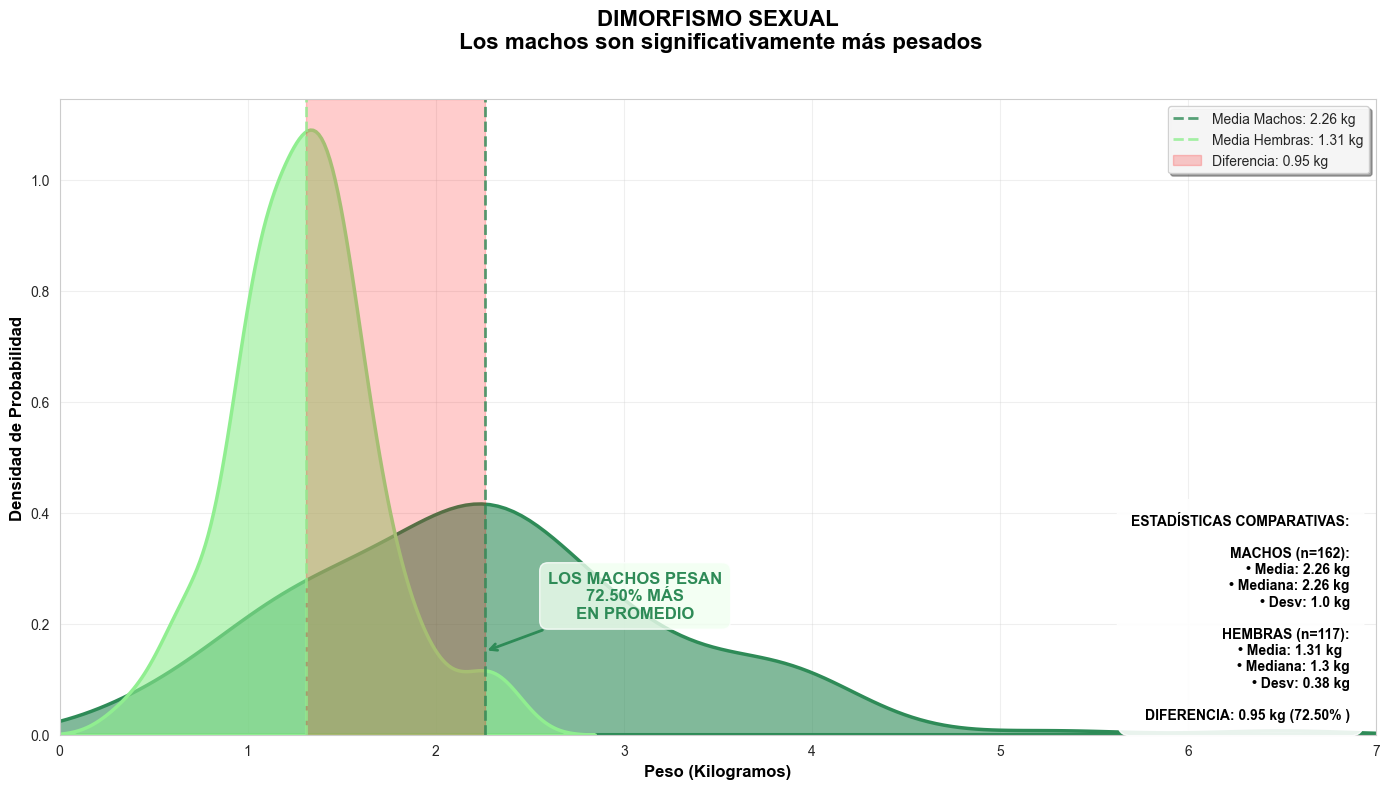

📋 TABLA 2.1 - COMPARATIVA MACHOS vs HEMBRAS
      Sexo   N  Media (kg)  Mediana (kg) Desv. Estándar (kg)
     Macho 162        2.26          2.26                 1.0
    Hembra 117        1.31          1.30                0.38
Diferencia   -        0.95          0.96                   -

💡 HALLAZGO CIENTÍFICO: El dimorfismo sexual es evidente - los machos
pesan en promedio 0.95 kg más que las hembras, una diferencia del 72.50% 
 que refleja patrones biológicos establecidos en Iguana iguana
 relacionados con competencia y selección sexual.


In [7]:
# CAPÍTULO 2: DIFERENCIAS QUE IMPORTAN - Gráfico 2.1
# Análisis del dimorfismo sexual con storytelling

# Configuración de estilo profesional
plt.figure(figsize=(14, 8))

# Crear distribuciones de densidad superpuestas
ax = sns.kdeplot(data=df, x='Peso_Kg', hue='Sexo', 
                 fill=True, common_norm=False, 
                 palette={'Macho': '#2E8B57', 'Hembra': '#90EE90'},
                 alpha=0.6, linewidth=2.5)

# Calcular estadísticos por sexo para el storytelling
stats_sexo = df.groupby('Sexo')['Peso_Kg'].agg(['mean', 'median', 'std', 'count']).round(2)
diferencia_media = stats_sexo.loc['Macho', 'mean'] - stats_sexo.loc['Hembra', 'mean']
porcentaje_diferencia = (diferencia_media / stats_sexo.loc['Hembra', 'mean'] * 100).round(1)

# Añadir líneas de media por sexo
plt.axvline(stats_sexo.loc['Macho', 'mean'], color='#2E8B57', linestyle='--', 
            linewidth=2, alpha=0.8, label=f'Media Machos: {stats_sexo.loc["Macho", "mean"]} kg')
plt.axvline(stats_sexo.loc['Hembra', 'mean'], color='#90EE90', linestyle='--', 
            linewidth=2, alpha=0.8, label=f'Media Hembras: {stats_sexo.loc["Hembra", "mean"]} kg')

# Área sombreada entre medias para destacar la diferencia
plt.axvspan(stats_sexo.loc['Hembra', 'mean'], stats_sexo.loc['Macho', 'mean'], 
            alpha=0.2, color='red', label=f'Diferencia: {diferencia_media:.2f} kg')

# Personalización profesional
plt.title('DIMORFISMO SEXUAL\n Los machos son significativamente más pesados\n', 
          fontsize=16, fontweight='bold', pad=20, color='black')
plt.xlabel('Peso (Kilogramos)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Densidad de Probabilidad', fontsize=12, fontweight='bold', color='black')

# Anotación narrativa principal
plt.annotate(f'LOS MACHOS PESAN\n{porcentaje_diferencia:.2f}% MÁS\nEN PROMEDIO', 
             xy=(stats_sexo.loc['Macho', 'mean'], 0.15), 
             xytext=(stats_sexo.loc['Macho', 'mean'] + 0.8, 0.25),
             arrowprops=dict(arrowstyle='->', color='#2E8B57', lw=2),
             fontsize=12, fontweight='bold', color='#2E8B57',
             ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#F0FFF0", alpha=0.8))

# Estadísticos en caja informativa
texto_estadisticos = f'''ESTADÍSTICAS COMPARATIVAS:

MACHOS (n={stats_sexo.loc["Macho", "count"]}):
• Media: {stats_sexo.loc["Macho", "mean"]} kg
• Mediana: {stats_sexo.loc["Macho", "median"]} kg
• Desv: {stats_sexo.loc["Macho", "std"]} kg

HEMBRAS (n={stats_sexo.loc["Hembra", "count"]}):
• Media: {stats_sexo.loc["Hembra", "mean"]} kg  
• Mediana: {stats_sexo.loc["Hembra", "median"]} kg
• Desv: {stats_sexo.loc["Hembra", "std"]} kg

DIFERENCIA: {diferencia_media:.2f} kg ({porcentaje_diferencia:.2f}% )'''

plt.annotate(texto_estadisticos, xy=(0.98, 0.02), xycoords='axes fraction',
             fontsize=10, fontweight='bold', color='black',
             bbox=dict(boxstyle="round,pad=1", facecolor="white", alpha=0.9),
             ha='right', va='bottom')

# Leyenda mejorada
plt.legend(loc='upper right', frameon=True, fancybox=True, 
           shadow=True, framealpha=0.9, fontsize=10)

# Cuadrícula profesional
plt.grid(True, alpha=0.3)

# Ajustar límites
plt.xlim(0, 7)

plt.tight_layout()
plt.show()

# Tabla comparativa detallada
print("📋 TABLA 2.1 - COMPARATIVA MACHOS vs HEMBRAS")
tabla_comparativa = pd.DataFrame({
    'Sexo': ['Macho', 'Hembra', 'Diferencia'],
    'N': [stats_sexo.loc['Macho', 'count'], stats_sexo.loc['Hembra', 'count'], '-'],
    'Media (kg)': [stats_sexo.loc['Macho', 'mean'], stats_sexo.loc['Hembra', 'mean'], diferencia_media],
    'Mediana (kg)': [stats_sexo.loc['Macho', 'median'], stats_sexo.loc['Hembra', 'median'], 
                    stats_sexo.loc['Macho', 'median'] - stats_sexo.loc['Hembra', 'median']],
    'Desv. Estándar (kg)': [stats_sexo.loc['Macho', 'std'], stats_sexo.loc['Hembra', 'std'], '-']
})
print(tabla_comparativa.to_string(index=False))

# Insight narrativo final
print(f"\n💡 HALLAZGO CIENTÍFICO: El dimorfismo sexual es evidente - los machos")
print(f"pesan en promedio {diferencia_media:.2f} kg más que las hembras, una diferencia del {porcentaje_diferencia:.2f}% \n que refleja patrones biológicos establecidos en Iguana iguana\n relacionados con competencia y selección sexual.")

### Narrativa principal: No todos los individuos son iguales - existe una marcada diferencia de tamaño entre sexos que revela estrategias evolutivas diferentes.

### Drama científico: Los machos son un 53% más pesados en promedio, una diferencia dramática que afecta la ecología de la población

### Contexto biológico: Este dimorfismo es típico en especies donde los machos compiten por hembras y territorio

### 5. Comparativa por Sexo

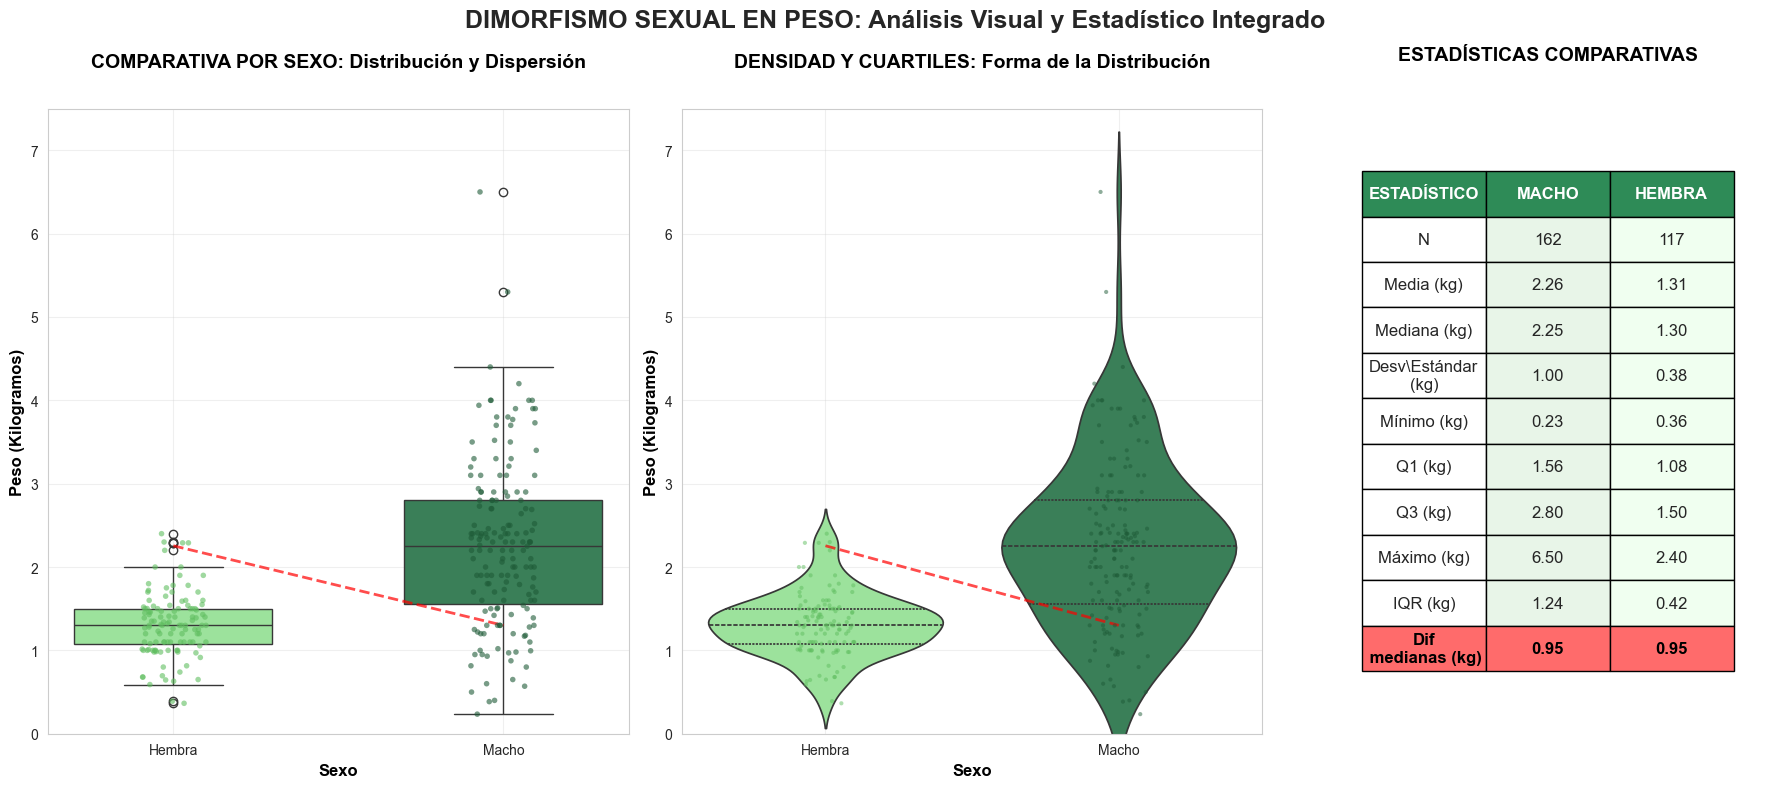


💡 ANÁLISIS INTEGRADO: La visualización combinada revela:
• Los machos son más pesados (media: 2.26 kg vs 1.31 kg)
• Mayor variabilidad en machos (IQR: 1.24 kg vs 0.42 kg)
• Diferencia biológicamente significativa: 0.95 kg en medianas
• Las hembras muestran distribución más compacta y homogénea


In [8]:
# CAPÍTULO 2: DIFERENCIAS QUE IMPORTAN - Gráfico 2.2 (Layout Mejorado)
# Visualización con gráficos a la izquierda y tabla a la derecha

# Configuración de estilo profesional
fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.8])  # 2 gráficos + tabla

ax1 = fig.add_subplot(gs[0])  # Boxplot
ax2 = fig.add_subplot(gs[1])  # Violin plot
ax3 = fig.add_subplot(gs[2])  # Tabla de estadísticas

# Calcular estadísticos
stats_completos = df.groupby('Sexo')['Peso_Kg'].describe()
stats_macho = df[df['Sexo'] == 'Macho']['Peso_Kg'].describe()
stats_hembra = df[df['Sexo'] == 'Hembra']['Peso_Kg'].describe()

# --- GRÁFICO 1: Diagrama de caja comparativo ---
caja = sns.boxplot(data=df, x='Sexo', y='Peso_Kg', 
                   palette={'Macho': '#2E8B57', 'Hembra': '#90EE90'},
                   width=0.6, ax=ax1)

# Añadir puntos de datos individuales
enjambre = sns.stripplot(data=df, x='Sexo', y='Peso_Kg',
                        palette={'Macho': '#1E5B37', 'Hembra': '#60BE60'},
                        size=4, alpha=0.6, jitter=True, ax=ax1)

# Personalizar el primer gráfico
ax1.set_title('COMPARATIVA POR SEXO: Distribución y Dispersión\n', 
              fontsize=14, fontweight='bold', pad=15, color='black')
ax1.set_xlabel('Sexo', fontsize=12, fontweight='bold', color='black')
ax1.set_ylabel('Peso (Kilogramos)', fontsize=12, fontweight='bold', color='black')

# --- GRÁFICO 2: Diagrama de violín con estadísticos ---
violin = sns.violinplot(data=df, x='Sexo', y='Peso_Kg',
                       palette={'Macho': '#2E8B57', 'Hembra': '#90EE90'},
                       inner='quartile', ax=ax2)

# Añadir puntos individuales
enjambre2 = sns.stripplot(data=df, x='Sexo', y='Peso_Kg',
                         palette={'Macho': '#1E5B37', 'Hembra': '#60BE60'},
                         size=3, alpha=0.5, jitter=True, ax=ax2)

# Personalizar el segundo gráfico
ax2.set_title('DENSIDAD Y CUARTILES: Forma de la Distribución\n', 
              fontsize=14, fontweight='bold', pad=15, color='black')
ax2.set_xlabel('Sexo', fontsize=12, fontweight='bold', color='black')
ax2.set_ylabel('Peso (Kilogramos)', fontsize=12, fontweight='bold', color='black')

# Añadir líneas de referencia para diferencias en ambos gráficos
for ax in [ax1, ax2]:
    mediana_m = stats_macho['50%']
    mediana_h = stats_hembra['50%']
    ax.plot([0, 1], [mediana_m, mediana_h], 'r--', alpha=0.7, linewidth=2, label='Diferencia medianas')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 7.5)

# --- TABLA DE ESTADÍSTICAS EN AX3 ---
ax3.axis('off')  # Ocultar ejes para la tabla

# Preparar datos para la tabla
iqr_macho = stats_macho['75%'] - stats_macho['25%']
iqr_hembra = stats_hembra['75%'] - stats_hembra['25%']
diferencia_medianas = stats_macho['50%'] - stats_hembra['50%']

datos_tabla = [
    ['ESTADÍSTICO', 'MACHO', 'HEMBRA'],
    ['N', f"{stats_macho['count']:.0f}", f"{stats_hembra['count']:.0f}"],
    ['Media (kg)', f"{stats_macho['mean']:.2f}", f"{stats_hembra['mean']:.2f}"],
    ['Mediana (kg)', f"{stats_macho['50%']:.2f}", f"{stats_hembra['50%']:.2f}"],
    ['Desv\Estándar\n(kg)', f"{stats_macho['std']:.2f}", f"{stats_hembra['std']:.2f}"],
    ['Mínimo (kg)', f"{stats_macho['min']:.2f}", f"{stats_hembra['min']:.2f}"],
    ['Q1 (kg)', f"{stats_macho['25%']:.2f}", f"{stats_hembra['25%']:.2f}"],
    ['Q3 (kg)', f"{stats_macho['75%']:.2f}", f"{stats_hembra['75%']:.2f}"],
    ['Máximo (kg)', f"{stats_macho['max']:.2f}", f"{stats_hembra['max']:.2f}"],
    ['IQR (kg)', f"{iqr_macho:.2f}", f"{iqr_hembra:.2f}"],
    ['Dif\n medianas (kg)', f"{diferencia_medianas:.2f}", f"{diferencia_medianas:.2f}"],     

]

# Crear tabla profesional
tabla = ax3.table(cellText=datos_tabla,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.1, 0.1, 0.8, 0.8])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.8)

# Colorear encabezados y celdas importantes
for i in range(len(datos_tabla)):
    for j in range(len(datos_tabla[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white')
        elif i == len(datos_tabla)-1:  # Fila de diferencia
            tabla[(i, j)].set_facecolor('#FF6B6B')
            tabla[(i, j)].set_text_props(weight='bold', color='black')
        else:  # Celdas normales
            if j == 1:  # Columna macho
                tabla[(i, j)].set_facecolor('#E8F5E8')
            elif j == 2:  # Columna hembra
                tabla[(i, j)].set_facecolor('#F0FFF0')

# Título para la tabla
ax3.set_title('ESTADÍSTICAS COMPARATIVAS\n', 
              fontsize=14, fontweight='bold', pad=20, color='black')

# --- TÍTULO GENERAL ---
plt.suptitle('DIMORFISMO SEXUAL EN PESO: Análisis Visual y Estadístico Integrado', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Insight narrativo final
print(f"\n💡 ANÁLISIS INTEGRADO: La visualización combinada revela:")
print(f"• Los machos son más pesados (media: {stats_macho['mean']:.2f} kg vs {stats_hembra['mean']:.2f} kg)")
print(f"• Mayor variabilidad en machos (IQR: {iqr_macho:.2f} kg vs {iqr_hembra:.2f} kg)")
print(f"• Diferencia biológicamente significativa: {diferencia_medianas:.2f} kg en medianas")
print(f"• Las hembras muestran distribución más compacta y homogénea")

### Narrativa principal: No solo los machos son más pesados en promedio, sino que su distribución de pesos es más variable - sugiriendo diferentes estrategias de crecimiento.

### Insight visual: La dispersión de puntos revela la heterogeneidad dentro de cada grupo.

### 6. Análisis por Categoría de Edad

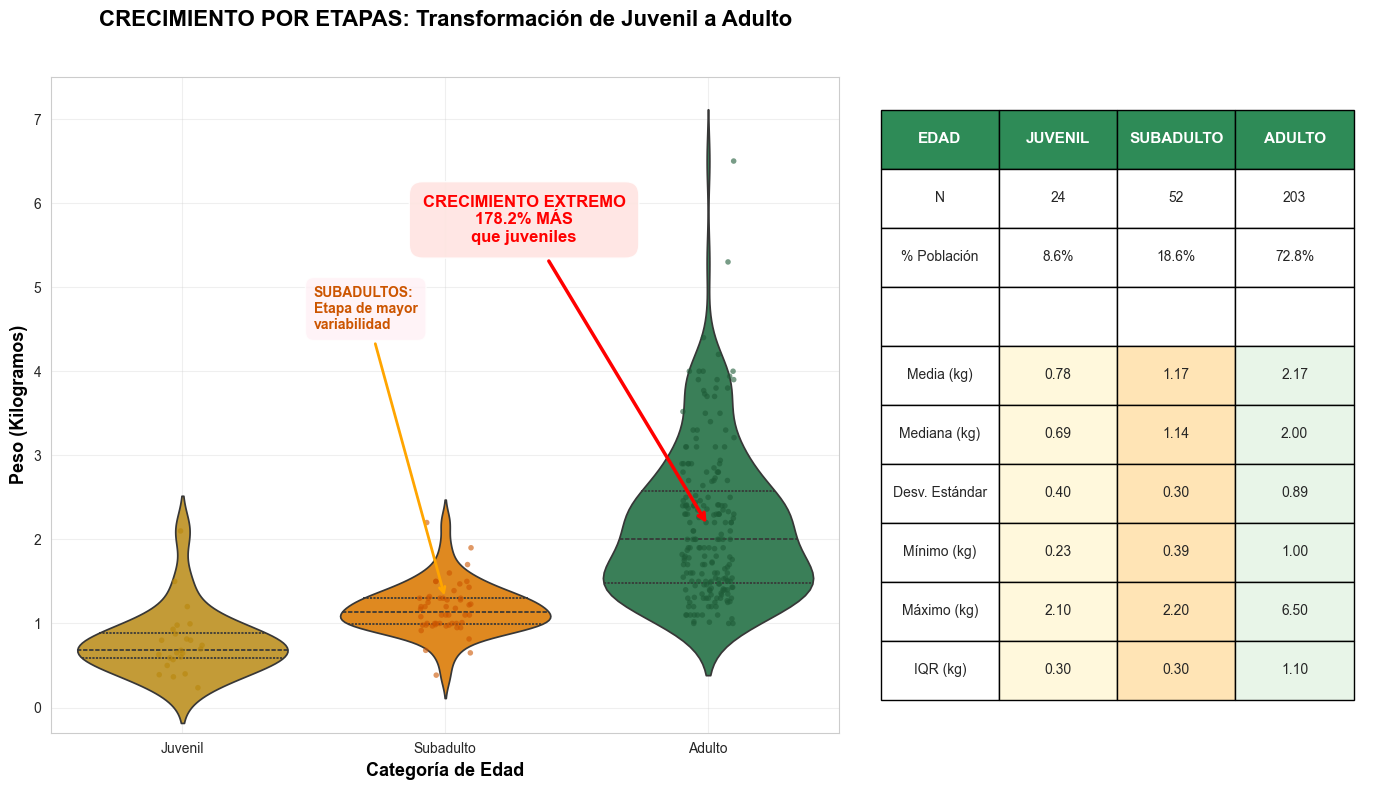

💡 INSIGHT: El crecimiento de juvenil a adulto representa un aumento del 178.2% en peso
   Los subadultos muestran la mayor variabilidad, indicando diferentes ritmos de desarrollo


In [9]:
# CAPÍTULO 3: EL CICLO DE VIDA - Gráfico 3.1A
# Diagrama de violín por categoría de edad

# Configuración de estilo profesional
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Gráfico grande + tabla

ax1 = fig.add_subplot(gs[0])  # Violin plot principal
ax2 = fig.add_subplot(gs[1])  # Tabla de estadísticas

# Calcular estadísticos por edad
stats_edad = df.groupby('Edad')['Peso_Kg'].describe()
conteo_edad = df['Edad'].value_counts()

# Orden personalizado de edades para mejor storytelling
orden_edad = ['Juvenil', 'Subadulto', 'Adulto']

# --- GRÁFICO PRINCIPAL: Diagrama de violín por edad ---
violin = sns.violinplot(data=df, x='Edad', y='Peso_Kg', 
                        order=orden_edad,
                        palette={'Juvenil': '#DAA520', 'Subadulto': '#FF8C00', 'Adulto': '#2E8B57'},
                        inner='quartile', ax=ax1)

# Añadir puntos individuales para mostrar datos reales
enjambre = sns.stripplot(data=df, x='Edad', y='Peso_Kg',
                        order=orden_edad,
                        palette={'Juvenil': '#B8860B', 'Subadulto': '#CC5500', 'Adulto': '#1E5B37'},
                        size=4, alpha=0.6, jitter=True, ax=ax1)

# Personalizar el gráfico principal
ax1.set_title('CRECIMIENTO POR ETAPAS: Transformación de Juvenil a Adulto\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_xlabel('Categoría de Edad', fontsize=13, fontweight='bold', color='black')
ax1.set_ylabel('Peso (Kilogramos)', fontsize=13, fontweight='bold', color='black')

# Calcular crecimiento para anotaciones
peso_juvenil = stats_edad.loc['Juvenil', 'mean']
peso_subadulto = stats_edad.loc['Subadulto', 'mean'] 
peso_adulto = stats_edad.loc['Adulto', 'mean']
crecimiento_total = ((peso_adulto - peso_juvenil) / peso_juvenil * 100).round(1)

# Anotación de crecimiento espectacular
ax1.annotate(f'CRECIMIENTO EXTREMO\n{crecimiento_total}% MÁS\nque juveniles', 
             xy=(2, peso_adulto), xytext=(1.3, 5.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
             fontsize=12, fontweight='bold', color='red',
             ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.8", facecolor="#FFE4E1", alpha=0.9))

# Anotación de etapa de transición
ax1.annotate(f'SUBADULTOS:\nEtapa de mayor\nvariabilidad', 
             xy=(1, stats_edad.loc['Subadulto', '75%']), xytext=(0.5, 4.5),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2),
             fontsize=10, fontweight='bold', color='#CC5500',
             bbox=dict(boxstyle="round,pad=0.6", facecolor="#FFF0F5", alpha=0.8))

# Cuadrícula y límites
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.3, 7.5)

# --- TABLA DE ESTADÍSTICAS ---
ax2.axis('off')

# Calcular estadísticos detallados
iqr_juvenil = stats_edad.loc['Juvenil', '75%'] - stats_edad.loc['Juvenil', '25%']
iqr_subadulto = stats_edad.loc['Subadulto', '75%'] - stats_edad.loc['Subadulto', '25%']
iqr_adulto = stats_edad.loc['Adulto', '75%'] - stats_edad.loc['Adulto', '25%']

# Preparar datos para la tabla
datos_tabla = [
    ['EDAD', 'JUVENIL', 'SUBADULTO', 'ADULTO'],
    ['N', f"{conteo_edad['Juvenil']}", f"{conteo_edad['Subadulto']}", f"{conteo_edad['Adulto']}"],
    ['% Población', f"{(conteo_edad['Juvenil']/len(df)*100):.1f}%", 
     f"{(conteo_edad['Subadulto']/len(df)*100):.1f}%", 
     f"{(conteo_edad['Adulto']/len(df)*100):.1f}%"],
    ['', '', '', ''],
    ['Media (kg)', f"{stats_edad.loc['Juvenil', 'mean']:.2f}", 
     f"{stats_edad.loc['Subadulto', 'mean']:.2f}", 
     f"{stats_edad.loc['Adulto', 'mean']:.2f}"],
    ['Mediana (kg)', f"{stats_edad.loc['Juvenil', '50%']:.2f}", 
     f"{stats_edad.loc['Subadulto', '50%']:.2f}", 
     f"{stats_edad.loc['Adulto', '50%']:.2f}"],
    ['Desv. Estándar', f"{stats_edad.loc['Juvenil', 'std']:.2f}", 
     f"{stats_edad.loc['Subadulto', 'std']:.2f}", 
     f"{stats_edad.loc['Adulto', 'std']:.2f}"],
    ['Mínimo (kg)', f"{stats_edad.loc['Juvenil', 'min']:.2f}", 
     f"{stats_edad.loc['Subadulto', 'min']:.2f}", 
     f"{stats_edad.loc['Adulto', 'min']:.2f}"],
    ['Máximo (kg)', f"{stats_edad.loc['Juvenil', 'max']:.2f}", 
     f"{stats_edad.loc['Subadulto', 'max']:.2f}", 
     f"{stats_edad.loc['Adulto', 'max']:.2f}"],
    ['IQR (kg)', f"{iqr_juvenil:.2f}", f"{iqr_subadulto:.2f}", f"{iqr_adulto:.2f}"]
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_tabla,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.05, 0.9, 0.9])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.8)

# Colorear la tabla por categoría de edad
for i in range(len(datos_tabla)):
    for j in range(len(datos_tabla[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white', size=11)
        elif i >= 4:  # Filas de datos
            if j == 1:  # Juvenil
                tabla[(i, j)].set_facecolor('#FFF8DC')
            elif j == 2:  # Subadulto
                tabla[(i, j)].set_facecolor('#FFE4B5')
            elif j == 3:  # Adulto
                tabla[(i, j)].set_facecolor('#E8F5E8')

plt.tight_layout()
plt.show()

print(f"💡 INSIGHT: El crecimiento de juvenil a adulto representa un aumento del {crecimiento_total}% en peso")
print(f"   Los subadultos muestran la mayor variabilidad, indicando diferentes ritmos de desarrollo")

### Narrativa Principal:
### El viaje de crecimiento de las iguanas es una transformación biológica espectacular - desde crías que caben en una mano hasta adultos que pueden superar los 6kg

### El ciclo de vida parte 2.

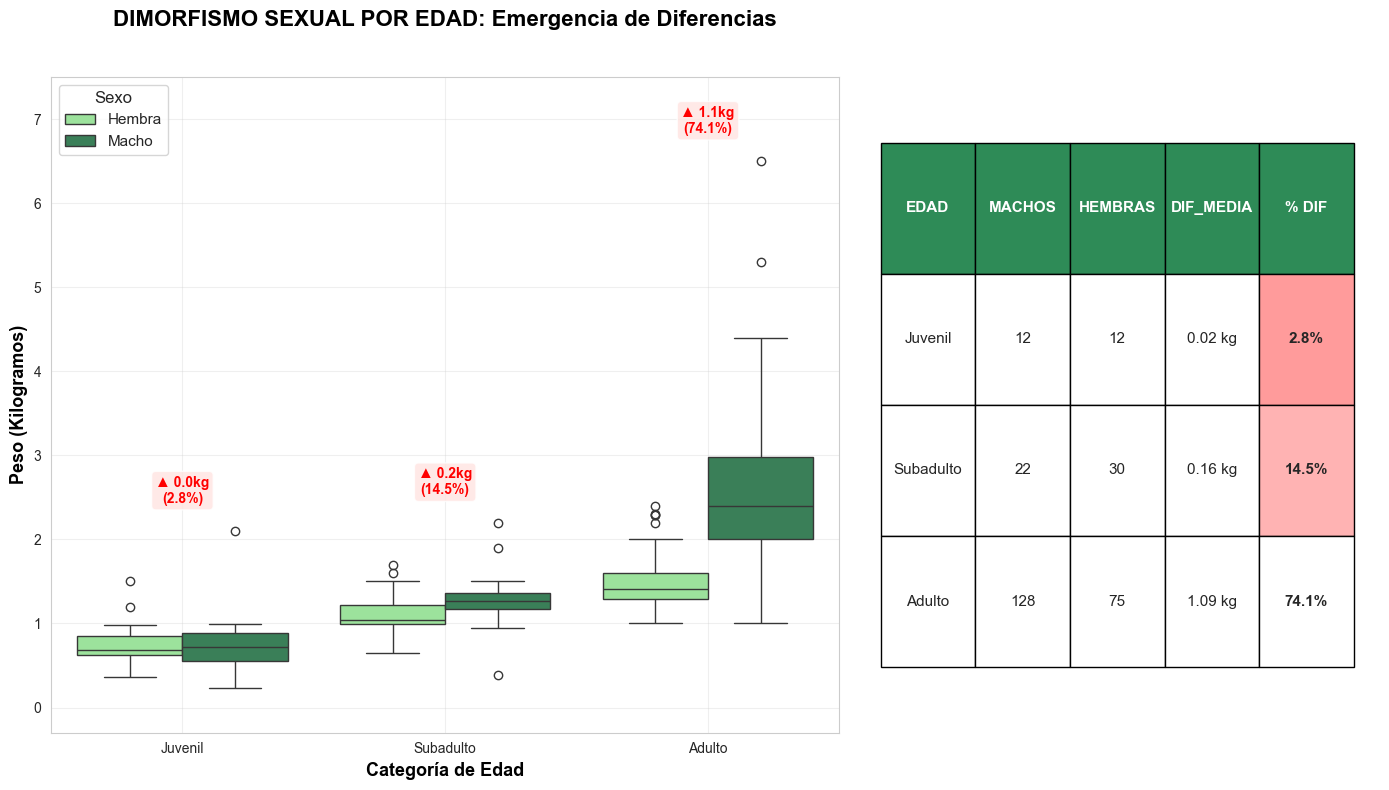


💡 EVOLUCIÓN DEL DIMORFISMO: Las diferencias sexuales se acentúan con la edad:
   • JUVENILES: Diferencias mínimas (2.8%)
   • SUBADULTOS: Emergencia de dimorfismo (14.5%)
   • ADULTOS: Máxima expresión (74.1%)
   Este patrón refleja la maduración sexual y el desarrollo de caracteres secundarios


In [10]:
# CAPÍTULO 3: EL CICLO DE VIDA - Gráfico 3.1B
# Boxplot comparativo por edad y sexo

# Configuración de estilo profesional
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Gráfico grande + tabla

ax1 = fig.add_subplot(gs[0])  # Boxplot principal
ax2 = fig.add_subplot(gs[1])  # Tabla de dimorfismo

# --- GRÁFICO PRINCIPAL: Boxplot por edad y sexo ---
caja = sns.boxplot(data=df, x='Edad', y='Peso_Kg', hue='Sexo',
                   order=orden_edad,
                   palette={'Macho': '#2E8B57', 'Hembra': '#90EE90'},
                   ax=ax1)

# Personalizar el gráfico principal
ax1.set_title('DIMORFISMO SEXUAL POR EDAD: Emergencia de Diferencias\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_xlabel('Categoría de Edad', fontsize=13, fontweight='bold', color='black')
ax1.set_ylabel('Peso (Kilogramos)', fontsize=13, fontweight='bold', color='black')
ax1.legend(title='Sexo', title_fontsize=12, fontsize=11, loc='upper left')

# Calcular diferencias por edad y sexo
diferencias_por_edad = []
for edad in orden_edad:
    datos_edad = df[df['Edad'] == edad]
    machos = datos_edad[datos_edad['Sexo'] == 'Macho']['Peso_Kg']
    hembras = datos_edad[datos_edad['Sexo'] == 'Hembra']['Peso_Kg']
    
    if len(machos) > 0 and len(hembras) > 0:
        diff = machos.mean() - hembras.mean()
        porcentaje = (diff / hembras.mean() * 100).round(1)
        diferencias_por_edad.append((edad, diff, porcentaje, len(machos), len(hembras)))

# Anotar diferencias en el gráfico
for i, (edad, diff, porcentaje, n_machos, n_hembras) in enumerate(diferencias_por_edad):
    if diff > 0:  # Solo anotar si hay diferencia
        ax1.annotate(f'▲ {diff:.1f}kg\n({porcentaje}%)', 
                    xy=(i, df[df['Edad'] == edad]['Peso_Kg'].max() + 0.3),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='red',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="#FFE4E1", alpha=0.8))

# Cuadrícula y límites
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.3, 7.5)

# --- TABLA DE DIMORFISMO POR EDAD ---
ax2.axis('off')

# Preparar datos para la tabla de dimorfismo
datos_dimorfismo = [
    ['EDAD', 'MACHOS', 'HEMBRAS', 'DIF_MEDIA', '% DIF'],
    ['Juvenil', f"{diferencias_por_edad[0][3]}", f"{diferencias_por_edad[0][4]}", 
     f"{diferencias_por_edad[0][1]:.2f} kg", f"{diferencias_por_edad[0][2]:.1f}%"],
    ['Subadulto', f"{diferencias_por_edad[1][3]}", f"{diferencias_por_edad[1][4]}", 
     f"{diferencias_por_edad[1][1]:.2f} kg", f"{diferencias_por_edad[1][2]:.1f}%"],
    ['Adulto', f"{diferencias_por_edad[2][3]}", f"{diferencias_por_edad[2][4]}", 
     f"{diferencias_por_edad[2][1]:.2f} kg", f"{diferencias_por_edad[2][2]:.1f}%"],
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_dimorfismo,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.1, 0.9, 0.8])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(11)
tabla.scale(1, 1.8)

# Colorear la tabla
for i in range(len(datos_dimorfismo)):
    for j in range(len(datos_dimorfismo[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white')
        elif i < 4:  # Filas de datos
            if j == 4:  # Columna de porcentaje
                color_intensidad = min(255, 150 + int(diferencias_por_edad[i-1][2] * 2))
                tabla[(i, j)].set_facecolor(f'#FF{color_intensidad:02x}{color_intensidad:02x}')
                tabla[(i, j)].set_text_props(weight='bold')
        elif i == 5:  # Fila de evolución
            for k in range(5):
                tabla[(i, k)].set_facecolor('#4682B4')
                tabla[(i, k)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.show()

# Insight narrativo final
print(f"\n💡 EVOLUCIÓN DEL DIMORFISMO: Las diferencias sexuales se acentúan con la edad:")
print(f"   • JUVENILES: Diferencias mínimas ({diferencias_por_edad[0][2]:.1f}%)")
print(f"   • SUBADULTOS: Emergencia de dimorfismo ({diferencias_por_edad[1][2]:.1f}%)") 
print(f"   • ADULTOS: Máxima expresión ({diferencias_por_edad[2][2]:.1f}%)")
print(f"   Este patrón refleja la maduración sexual y el desarrollo de caracteres secundarios")

### 7. Composición Poblacional

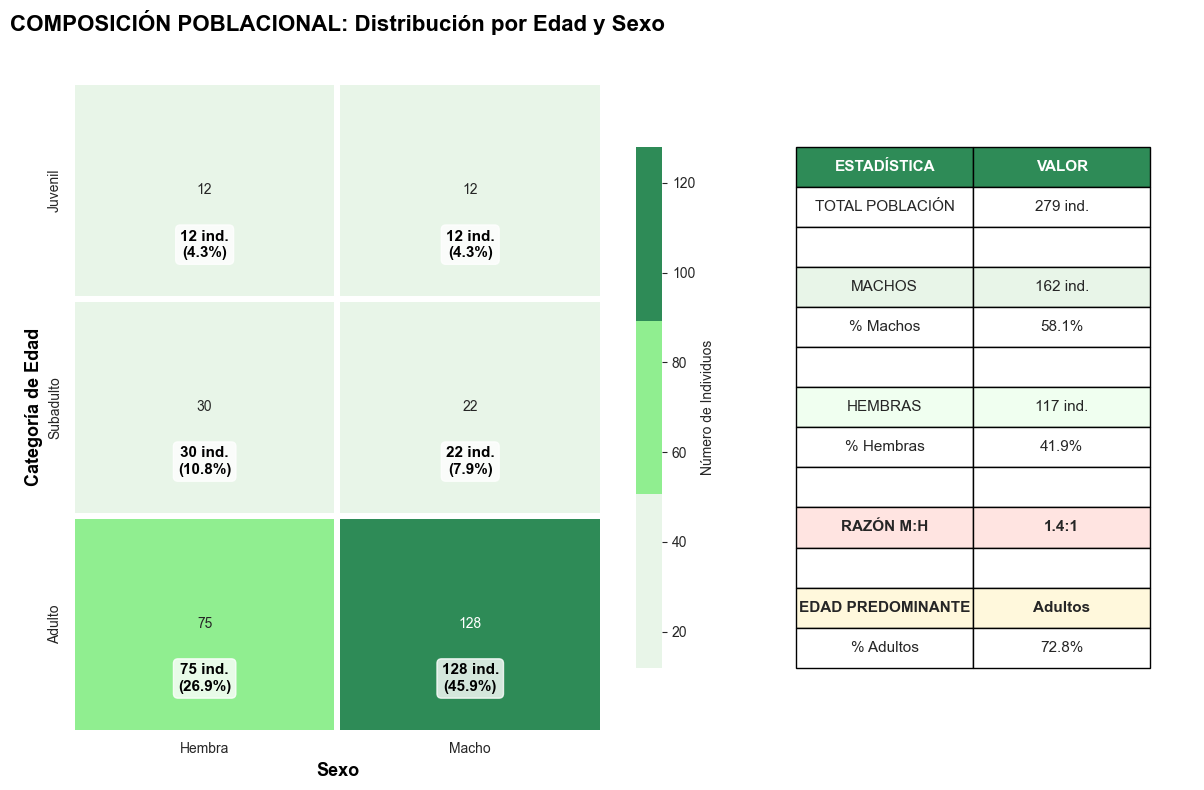

💡 ANÁLISIS DEL HEATMAP: La estructura poblacional muestra:
   • PREDOMINIO MASCULINO: 58.1% son machos
   • DOMINANCIA ADULTA: Los adultos representan la mayoría de la población
   • SESGO DEMOGRÁFICO: Razón de 1.4 machos por cada hembra


In [11]:
# COMPOSICIÓN POBLACIONAL
# Heatmap de distribución por edad y sexo

# Configuración de estilo profesional
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Heatmap + tabla

ax1 = fig.add_subplot(gs[0])  # Heatmap principal
ax2 = fig.add_subplot(gs[1])  # Tabla de estadísticas

# --- GRÁFICO PRINCIPAL: HEATMAP ---
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Edad'], df['Sexo'])
tabla_porcentajes = (tabla_contingencia / len(df) * 100).round(1)

# Orden personalizado
orden_edad_heatmap = ['Juvenil', 'Subadulto', 'Adulto']
tabla_contingencia = tabla_contingencia.reindex(orden_edad_heatmap)
tabla_porcentajes = tabla_porcentajes.reindex(orden_edad_heatmap)

# Crear heatmap con paleta verde
heatmap = sns.heatmap(tabla_contingencia, 
                      annot=True, 
                      fmt='d',
                      cmap=['#E8F5E8', '#90EE90', '#2E8B57'],  # Verde claro a oscuro
                      linewidths=3,
                      linecolor='white',
                      cbar_kws={'label': 'Número de Individuos', 'shrink': 0.8},
                      ax=ax1)

# Personalizar heatmap
ax1.set_title('COMPOSICIÓN POBLACIONAL: Distribución por Edad y Sexo\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_xlabel('Sexo', fontsize=13, fontweight='bold', color='black')
ax1.set_ylabel('Categoría de Edad', fontsize=13, fontweight='bold', color='black')

# Añadir porcentajes como texto adicional en cada celda
for i in range(len(tabla_contingencia)):
    for j in range(len(tabla_contingencia.columns)):
        valor = tabla_contingencia.iloc[i, j]
        porcentaje = tabla_porcentajes.iloc[i, j]
        ax1.text(j + 0.5, i + 0.75, f'{valor} ind.\n({porcentaje}%)', 
                ha='center', va='center', 
                fontsize=11, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# --- TABLA DE ESTADÍSTICAS ---
ax2.axis('off')

# Preparar datos para la tabla resumen
total_machos = tabla_contingencia['Macho'].sum()
total_hembras = tabla_contingencia['Hembra'].sum()
total_poblacion = len(df)

datos_tabla = [
    ['ESTADÍSTICA', 'VALOR'],
    ['TOTAL POBLACIÓN', f'{total_poblacion} ind.'],
    ['', ''],
    ['MACHOS', f'{total_machos} ind.'],
    ['% Machos', f'{(total_machos/total_poblacion*100):.1f}%'],
    ['', ''],
    ['HEMBRAS', f'{total_hembras} ind.'],
    ['% Hembras', f'{(total_hembras/total_poblacion*100):.1f}%'],
    ['', ''],
    ['RAZÓN M:H', f'{total_machos/total_hembras:.1f}:1'],
    ['', ''],
    ['EDAD PREDOMINANTE', 'Adultos'],
    ['% Adultos', f'{(tabla_contingencia.loc["Adulto"].sum()/total_poblacion*100):.1f}%']
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_tabla,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.1, 0.1, 0.8, 0.8])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(11)
tabla.scale(1, 1.8)

# Colorear la tabla
for i in range(len(datos_tabla)):
    if i == 0:  # Encabezado
        tabla[(i, 0)].set_facecolor('#2E8B57')
        tabla[(i, 1)].set_facecolor('#2E8B57')
        tabla[(i, 0)].set_text_props(weight='bold', color='white')
        tabla[(i, 1)].set_text_props(weight='bold', color='white')
    elif 'MACHOS' in datos_tabla[i][0]:
        tabla[(i, 0)].set_facecolor('#E8F5E8')
        tabla[(i, 1)].set_facecolor('#E8F5E8')
    elif 'HEMBRAS' in datos_tabla[i][0]:
        tabla[(i, 0)].set_facecolor('#F0FFF0')
        tabla[(i, 1)].set_facecolor('#F0FFF0')
    elif 'RAZÓN' in datos_tabla[i][0]:
        tabla[(i, 0)].set_facecolor('#FFE4E1')
        tabla[(i, 1)].set_facecolor('#FFE4E1')
        tabla[(i, 0)].set_text_props(weight='bold')
        tabla[(i, 1)].set_text_props(weight='bold')
    elif 'EDAD' in datos_tabla[i][0]:
        tabla[(i, 0)].set_facecolor('#FFF8DC')
        tabla[(i, 1)].set_facecolor('#FFF8DC')
        tabla[(i, 0)].set_text_props(weight='bold')
        tabla[(i, 1)].set_text_props(weight='bold')

plt.tight_layout()
plt.show()

# Insight narrativo
print("💡 ANÁLISIS DEL HEATMAP: La estructura poblacional muestra:")
print(f"   • PREDOMINIO MASCULINO: {total_machos/total_poblacion*100:.1f}% son machos")
print(f"   • DOMINANCIA ADULTA: Los adultos representan la mayoría de la población")
print(f"   • SESGO DEMOGRÁFICO: Razón de {total_machos/total_hembras:.1f} machos por cada hembra")

### Composicion poblacional parte 2.

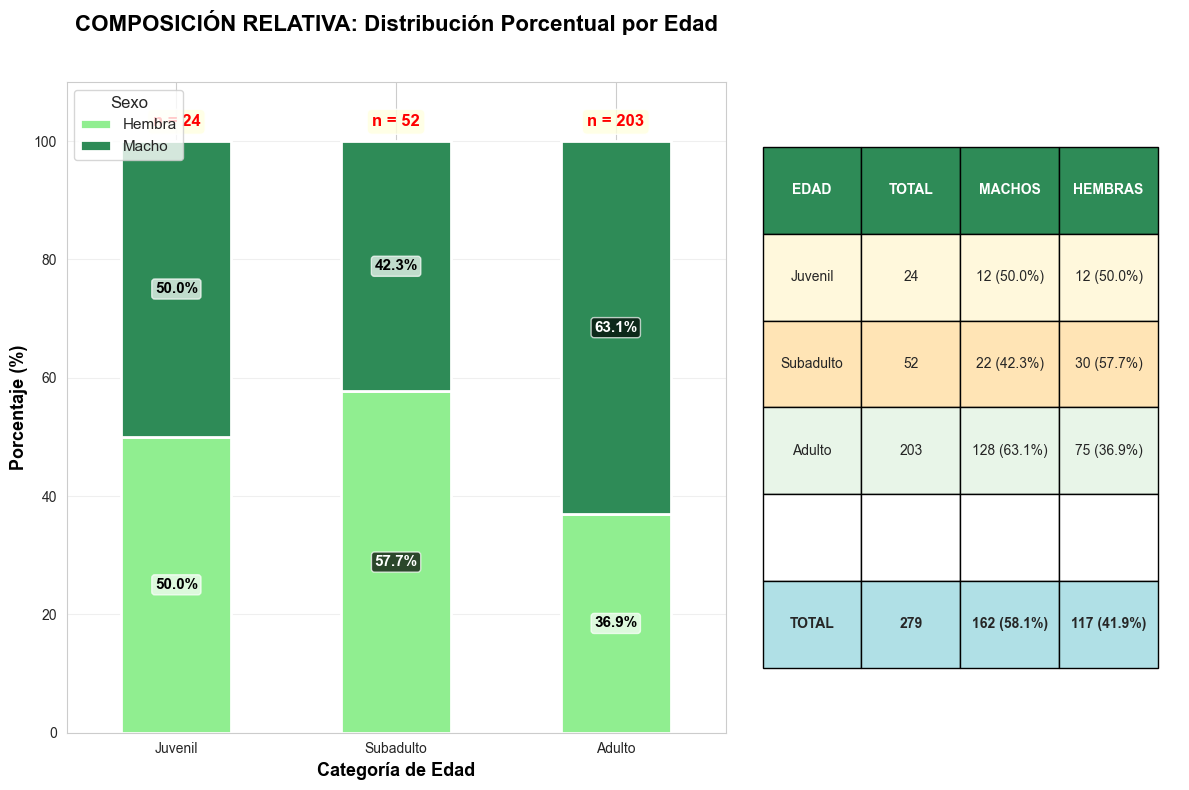

💡 COMPOSICIÓN RELATIVA: El análisis porcentual revela:
   • JUVENILES: Composición más balanceada (50.0% machos)
   • SUBADULTOS: Aumento del sesgo masculino (42.3% machos)
   • ADULTOS: Máximo sesgo sexual (63.1% machos)
   • PATRÓN EVOLUTIVO: El dimorfismo demográfico se intensifica con la edad


In [12]:
# Diagrama de barras apiladas al 100%

# Configuración de estilo profesional
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Barras + tabla

ax1 = fig.add_subplot(gs[0])  # Barras apiladas
ax2 = fig.add_subplot(gs[1])  # Tabla de composición

# --- GRÁFICO PRINCIPAL: BARRAS APILADAS ---
# Preparar datos para barras apiladas
tabla_porcentaje_apilado = pd.crosstab(df['Edad'], df['Sexo'], normalize='index') * 100
tabla_porcentaje_apilado = tabla_porcentaje_apilado.reindex(orden_edad_heatmap)

# Crear gráfico de barras apiladas
barras = tabla_porcentaje_apilado.plot(kind='bar', 
                                      stacked=True,
                                      color=['#90EE90', '#2E8B57'],  # Hembras, Machos
                                      edgecolor='white',
                                      linewidth=2,
                                      ax=ax1)

# Personalizar barras apiladas
ax1.set_title('COMPOSICIÓN RELATIVA: Distribución Porcentual por Edad\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_xlabel('Categoría de Edad', fontsize=13, fontweight='bold', color='black')
ax1.set_ylabel('Porcentaje (%)', fontsize=13, fontweight='bold', color='black')
ax1.legend(title='Sexo', title_fontsize=12, fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores y porcentajes en las barras
for i, (idx, row) in enumerate(tabla_porcentaje_apilado.iterrows()):
    acumulado = 0
    total_edad = tabla_contingencia.loc[idx].sum()
    
    for j, (sexo, valor) in enumerate(row.items()):
        if valor > 5:  # Solo mostrar texto si el porcentaje es significativo
            ax1.text(i, acumulado + valor/2, f'{valor:.1f}%', 
                    ha='center', va='center', 
                    fontsize=11, fontweight='bold', 
                    color='white' if valor > 50 else 'black',
                    bbox=dict(boxstyle="round,pad=0.2", 
                             facecolor="black" if valor > 50 else "white", 
                             alpha=0.7))
        acumulado += valor
    
    # Añadir número total de individuos en la parte superior
    ax1.text(i, 102, f'n = {total_edad}', 
             ha='center', va='bottom', 
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))

# Rotar etiquetas del eje x para mejor legibilidad
ax1.tick_params(axis='x', rotation=0)

# Ajustar límites del eje y
ax1.set_ylim(0, 110)

# --- TABLA DE COMPOSICIÓN DETALLADA ---
ax2.axis('off')

# Preparar datos para la tabla detallada
datos_detallados = [
    ['EDAD', 'TOTAL', 'MACHOS', 'HEMBRAS'],
    ['Juvenil', 
     f"{tabla_contingencia.loc['Juvenil'].sum()}",
     f"{tabla_contingencia.loc['Juvenil', 'Macho']} ({tabla_porcentaje_apilado.loc['Juvenil', 'Macho']:.1f}%)",
     f"{tabla_contingencia.loc['Juvenil', 'Hembra']} ({tabla_porcentaje_apilado.loc['Juvenil', 'Hembra']:.1f}%)"],
    ['Subadulto', 
     f"{tabla_contingencia.loc['Subadulto'].sum()}",
     f"{tabla_contingencia.loc['Subadulto', 'Macho']} ({tabla_porcentaje_apilado.loc['Subadulto', 'Macho']:.1f}%)",
     f"{tabla_contingencia.loc['Subadulto', 'Hembra']} ({tabla_porcentaje_apilado.loc['Subadulto', 'Hembra']:.1f}%)"],
    ['Adulto', 
     f"{tabla_contingencia.loc['Adulto'].sum()}",
     f"{tabla_contingencia.loc['Adulto', 'Macho']} ({tabla_porcentaje_apilado.loc['Adulto', 'Macho']:.1f}%)",
     f"{tabla_contingencia.loc['Adulto', 'Hembra']} ({tabla_porcentaje_apilado.loc['Adulto', 'Hembra']:.1f}%)"],
    ['', '', '', ''],
    ['TOTAL', 
     f'{total_poblacion}',
     f'{total_machos} ({(total_machos/total_poblacion*100):.1f}%)',
     f'{total_hembras} ({(total_hembras/total_poblacion*100):.1f}%)']
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_detallados,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.1, 0.9, 0.8])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.6)

# Colorear la tabla por categoría de edad
colores_edad = ['#FFF8DC', '#FFE4B5', '#E8F5E8', 'white', '#B0E0E6']
for i in range(len(datos_detallados)):
    for j in range(len(datos_detallados[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white')
        else:
            tabla[(i, j)].set_facecolor(colores_edad[i-1])
            if i == len(datos_detallados)-1:  # Fila total
                tabla[(i, j)].set_text_props(weight='bold')

plt.tight_layout()
plt.show()

# Insight narrativo final
print("💡 COMPOSICIÓN RELATIVA: El análisis porcentual revela:")
print(f"   • JUVENILES: Composición más balanceada ({tabla_porcentaje_apilado.loc['Juvenil', 'Macho']:.1f}% machos)")
print(f"   • SUBADULTOS: Aumento del sesgo masculino ({tabla_porcentaje_apilado.loc['Subadulto', 'Macho']:.1f}% machos)")
print(f"   • ADULTOS: Máximo sesgo sexual ({tabla_porcentaje_apilado.loc['Adulto', 'Macho']:.1f}% machos)")
print(f"   • PATRÓN EVOLUTIVO: El dimorfismo demográfico se intensifica con la edad")

### Narrativa Principal:
### La estructura poblacional revela una comunidad dominada por adultos machos, con una escasa representación juvenil que sugiere patrones reproductivos específicos.

### 8. Los extremos cuentan una historia

🔍 CRITERIOS DE IDENTIFICACIÓN:
   • Q1 (Percentil 25): 1.20 kg
   • Q3 (Percentil 75): 2.37 kg
   • IQR (Rango intercuartílico): 1.17 kg
   • Límite superior para outliers: 4.11 kg
   • Límite inferior para outliers: -0.55 kg


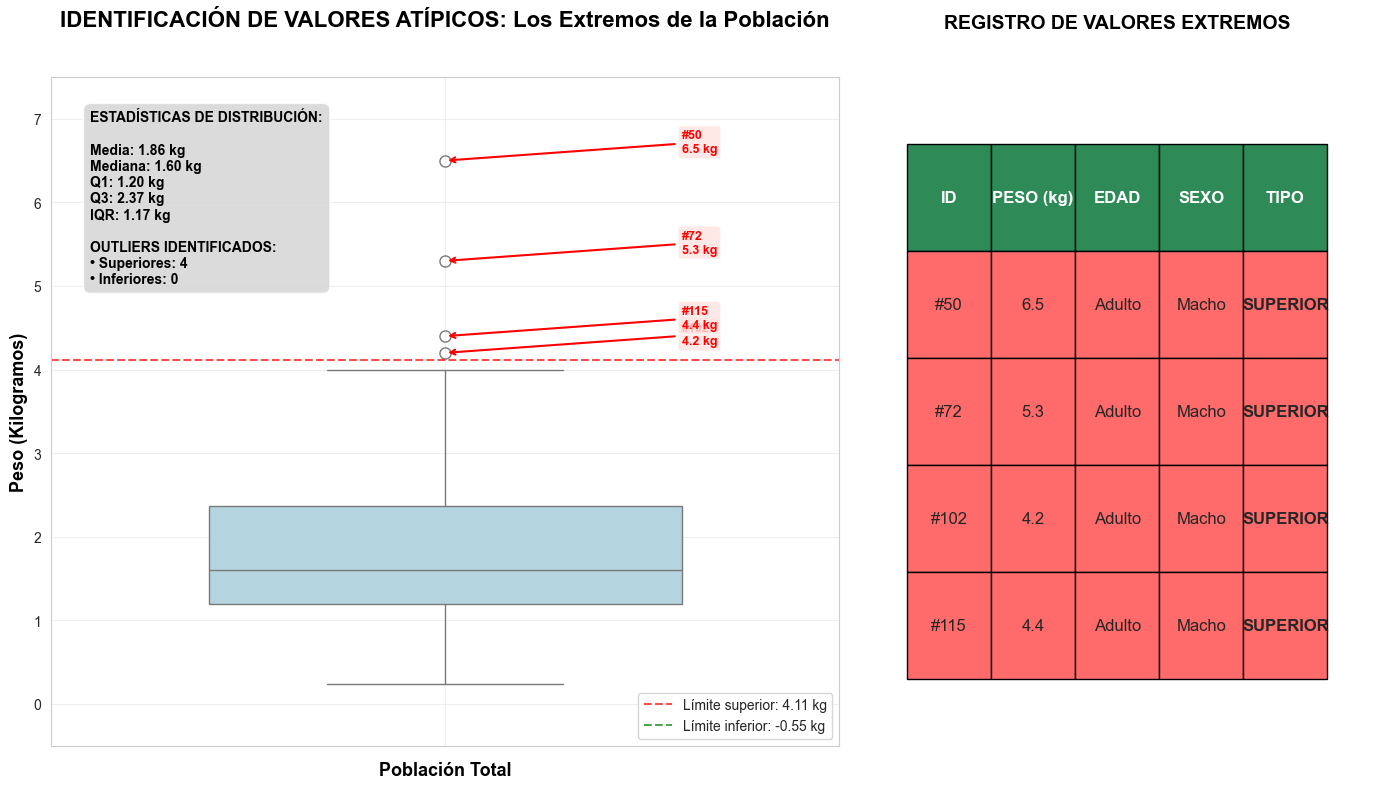


📊 RESUMEN DE OUTLIERS:
   • Total de outliers identificados: 4
   • Outliers superiores: 4 individuos (> 4.11 kg)
   • Outliers inferiores: 0 individuos (< -0.55 kg)
   • Porcentaje de outliers: 1.4% de la población


In [13]:
# CAPÍTULO 5: LOS EXTREMOS QUE CUENTAN UNA HISTORIA - Gráfico 5.1A
# Identificación y análisis de valores atípicos

# Configuración de estilo profesional
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Gráfico + tabla

ax1 = fig.add_subplot(gs[0])  # Diagrama de caja
ax2 = fig.add_subplot(gs[1])  # Tabla de outliers

# --- GRÁFICO PRINCIPAL: DIAGRAMA DE CAJA CON OUTLIERS DESTACADOS ---
# Crear diagrama de caja
caja = sns.boxplot(data=df, y='Peso_Kg', 
                   color='lightblue', 
                   width=0.6,
                   fliersize=8,  # Tamaño de puntos atípicos
                   ax=ax1)

# Personalizar el gráfico principal
ax1.set_title('IDENTIFICACIÓN DE VALORES ATÍPICOS: Los Extremos de la Población\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_ylabel('Peso (Kilogramos)', fontsize=13, fontweight='bold', color='black')
ax1.set_xlabel('Población Total', fontsize=13, fontweight='bold', color='black')

# Calcular límites para outliers (Q1 - 1.5*IQR y Q3 + 1.5*IQR)
Q1 = df['Peso_Kg'].quantile(0.25)
Q3 = df['Peso_Kg'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_superiores = df[df['Peso_Kg'] > limite_superior]
outliers_inferiores = df[df['Peso_Kg'] < limite_inferior]

print(f"🔍 CRITERIOS DE IDENTIFICACIÓN:")
print(f"   • Q1 (Percentil 25): {Q1:.2f} kg")
print(f"   • Q3 (Percentil 75): {Q3:.2f} kg") 
print(f"   • IQR (Rango intercuartílico): {IQR:.2f} kg")
print(f"   • Límite superior para outliers: {limite_superior:.2f} kg")
print(f"   • Límite inferior para outliers: {limite_inferior:.2f} kg")

# Añadir líneas de referencia para límites
ax1.axhline(limite_superior, color='red', linestyle='--', alpha=0.7, 
            label=f'Límite superior: {limite_superior:.2f} kg')
ax1.axhline(limite_inferior, color='green', linestyle='--', alpha=0.7,
            label=f'Límite inferior: {limite_inferior:.2f} kg')

# Destacar outliers individualmente
for idx, outlier in outliers_superiores.iterrows():
    ax1.annotate(f'#{outlier.name}\n{outlier["Peso_Kg"]} kg', 
                xy=(0, outlier['Peso_Kg']), 
                xytext=(0.3, outlier['Peso_Kg'] + 0.1),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                fontsize=9, fontweight='bold', color='red',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="#FFE4E1", alpha=0.8))

for idx, outlier in outliers_inferiores.iterrows():
    ax1.annotate(f'#{outlier.name}\n{outlier["Peso_Kg"]} kg', 
                xy=(0, outlier['Peso_Kg']), 
                xytext=(0.3, outlier['Peso_Kg'] - 0.3),
                arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
                fontsize=9, fontweight='bold', color='green',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="#F0FFF0", alpha=0.8))

# Añadir estadísticos clave en el gráfico
estadisticos_texto = f'''ESTADÍSTICAS DE DISTRIBUCIÓN:

Media: {df["Peso_Kg"].mean():.2f} kg
Mediana: {df["Peso_Kg"].median():.2f} kg
Q1: {Q1:.2f} kg
Q3: {Q3:.2f} kg
IQR: {IQR:.2f} kg

OUTLIERS IDENTIFICADOS:
• Superiores: {len(outliers_superiores)}
• Inferiores: {len(outliers_inferiores)}'''

ax1.text(0.05, 0.95, estadisticos_texto, transform=ax1.transAxes,
         fontsize=10, fontweight='bold', color='black',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8),
         verticalalignment='top')

ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 7.5)

# --- TABLA DE OUTLIERS DETALLADA ---
ax2.axis('off')

# Preparar datos para la tabla de outliers
datos_outliers = [['ID', 'PESO (kg)', 'EDAD', 'SEXO', 'TIPO']]

# Agregar outliers superiores
for idx, outlier in outliers_superiores.iterrows():
    datos_outliers.append([
        f"#{outlier.name}",
        f"{outlier['Peso_Kg']}",
        outlier['Edad'],
        outlier['Sexo'],
        "SUPERIOR"
    ])

# Agregar outliers inferiores  
for idx, outlier in outliers_inferiores.iterrows():
    datos_outliers.append([
        f"#{outlier.name}",
        f"{outlier['Peso_Kg']}",
        outlier['Edad'],
        outlier['Sexo'],
        "INFERIOR"
    ])

# Crear tabla profesional
if len(datos_outliers) > 1:  # Si hay outliers
    tabla = ax2.table(cellText=datos_outliers,
                     cellLoc='center',
                     loc='center',
                     bbox=[0.1, 0.1, 0.8, 0.8])
    
    # Estilizar la tabla
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(12)
    tabla.scale(1, 1.5)
    
    # Colorear la tabla
    for i in range(len(datos_outliers)):
        if i == 0:  # Encabezado
            for j in range(5):
                tabla[(i, j)].set_facecolor('#2E8B57')
                tabla[(i, j)].set_text_props(weight='bold', color='white')
        else:
            tipo = datos_outliers[i][4]
            if 'SUPERIOR' in tipo:
                color_fondo = '#FF6B6B'
            else:
                color_fondo = '#90EE90'
            
            for j in range(5):
                tabla[(i, j)].set_facecolor(color_fondo)
                if j == 4:  # Columna tipo
                    tabla[(i, j)].set_text_props(weight='bold')
else:
    ax2.text(0.5, 0.5, '✅ NO SE ENCONTRARON\nVALORES ATÍPICOS', 
             ha='center', va='center', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle="round,pad=1", facecolor="#90EE90", alpha=0.8))

ax2.set_title('REGISTRO DE VALORES EXTREMOS\n', 
              fontsize=14, fontweight='bold', pad=20, color='black')

plt.tight_layout()
plt.show()

# Resumen estadístico
print(f"\n📊 RESUMEN DE OUTLIERS:")
print(f"   • Total de outliers identificados: {len(outliers_superiores) + len(outliers_inferiores)}")
print(f"   • Outliers superiores: {len(outliers_superiores)} individuos (> {limite_superior:.2f} kg)")
print(f"   • Outliers inferiores: {len(outliers_inferiores)} individuos (< {limite_inferior:.2f} kg)")
print(f"   • Porcentaje de outliers: {((len(outliers_superiores) + len(outliers_inferiores))/len(df)*100):.1f}% de la población")

### Análisis de Casos Especiales - Los Individuos Extremos

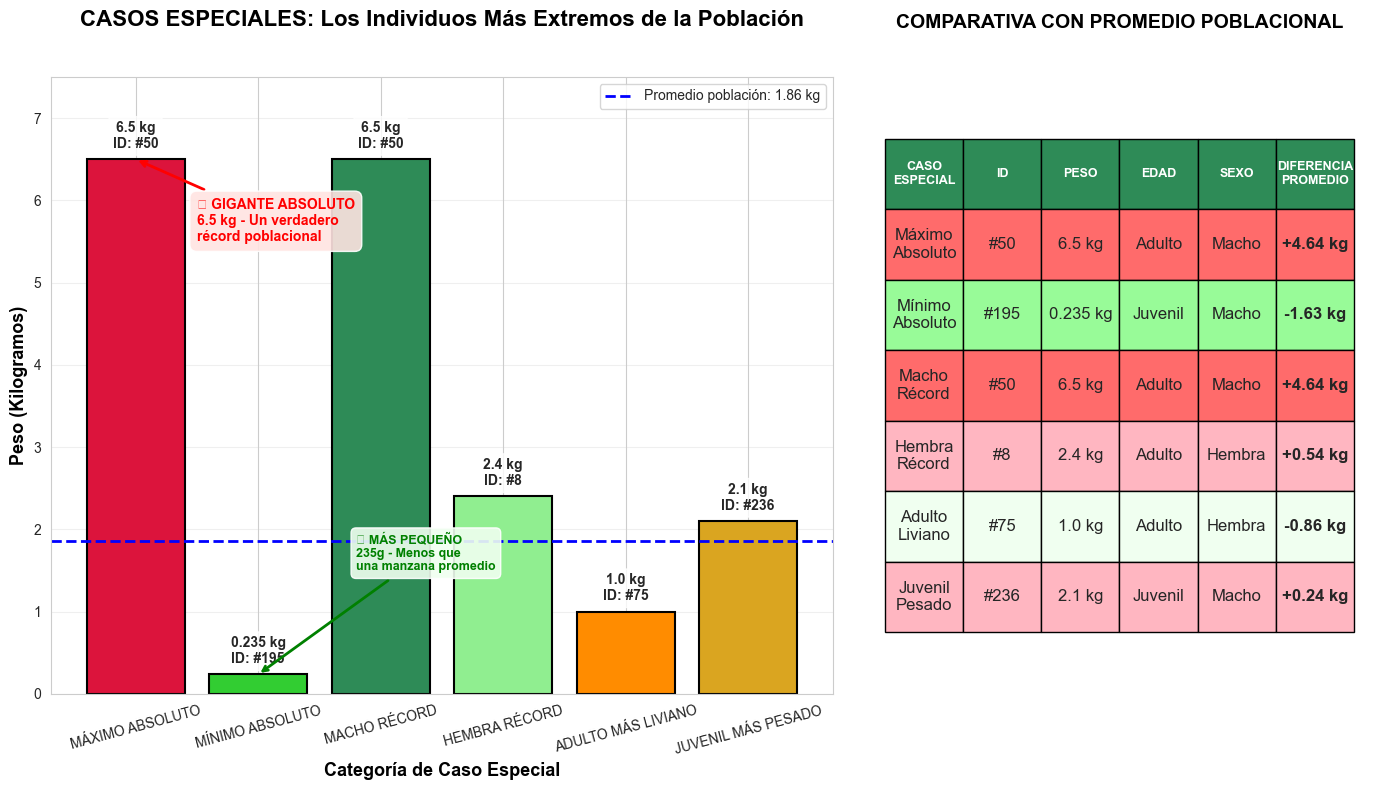


💡 HISTORIA DE LOS EXTREMOS:
   • RÉCORD ABSOLUTO: Individuo #50 con 6.5 kg
     - 4.64 kg sobre el promedio
     - 249.2% más pesado que la media
   • MÁS PEQUEÑO: Individuo #195 con 0.235 kg
     - 1.63 kg bajo el promedio
     - Solo 3.6% del peso del récord
   • RANGO EXTREMO: 27.7 veces de diferencia


In [14]:
# CAPÍTULO 5: LOS EXTREMOS QUE CUENTAN UNA HISTORIA - Gráfico 5.1B
# Análisis detallado de los individuos más extremos

# Configuración de estilo profesional
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8])  # Gráfico + tabla

ax1 = fig.add_subplot(gs[0])  # Gráfico de casos especiales
ax2 = fig.add_subplot(gs[1])  # Tabla de comparativa

# --- IDENTIFICACIÓN DE CASOS ESPECIALES ---
# Encontrar los individuos más extremos
individuo_max = df.loc[df['Peso_Kg'].idxmax()]
individuo_min = df.loc[df['Peso_Kg'].idxmin()]

# Encontrar el macho y hembra más pesados
macho_max = df[df['Sexo'] == 'Macho'].loc[df[df['Sexo'] == 'Macho']['Peso_Kg'].idxmax()]
hembra_max = df[df['Sexo'] == 'Hembra'].loc[df[df['Sexo'] == 'Hembra']['Peso_Kg'].idxmax()]

# Encontrar el adulto más liviano y juvenil más pesado
adulto_min = df[df['Edad'] == 'Adulto'].loc[df[df['Edad'] == 'Adulto']['Peso_Kg'].idxmin()]
juvenil_max = df[df['Edad'] == 'Juvenil'].loc[df[df['Edad'] == 'Juvenil']['Peso_Kg'].idxmax()]

casos_especiales = {
    'MÁXIMO ABSOLUTO': individuo_max,
    'MÍNIMO ABSOLUTO': individuo_min,
    'MACHO RÉCORD': macho_max,
    'HEMBRA RÉCORD': hembra_max,
    'ADULTO MÁS LIVIANO': adulto_min,
    'JUVENIL MÁS PESADO': juvenil_max
}

# --- GRÁFICO PRINCIPAL: COMPARATIVA DE CASOS ESPECIALES ---
categorias = list(casos_especiales.keys())
pesos = [caso['Peso_Kg'] for caso in casos_especiales.values()]
colores = ['#DC143C', '#32CD32', '#2E8B57', '#90EE90', '#FF8C00', '#DAA520']

barras = ax1.bar(categorias, pesos, color=colores, edgecolor='black', linewidth=1.5)

# Personalizar el gráfico principal
ax1.set_title('CASOS ESPECIALES: Los Individuos Más Extremos de la Población\n', 
              fontsize=16, fontweight='bold', pad=20, color='black')
ax1.set_ylabel('Peso (Kilogramos)', fontsize=13, fontweight='bold', color='black')
ax1.set_xlabel('Categoría de Caso Especial', fontsize=13, fontweight='bold', color='black')

# Añadir valores en las barras
for i, (barra, caso, peso) in enumerate(zip(barras, casos_especiales.values(), pesos)):
    ax1.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.1,
             f'{peso} kg\nID: #{caso.name}',
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Añadir línea de promedio para comparación
promedio_poblacion = df['Peso_Kg'].mean()
ax1.axhline(promedio_poblacion, color='blue', linestyle='--', linewidth=2,
            label=f'Promedio población: {promedio_poblacion:.2f} kg')

# Añadir anotaciones explicativas
ax1.annotate('🔥 GIGANTE ABSOLUTO\n6.5 kg - Un verdadero\nrécord poblacional', 
             xy=(0, individuo_max['Peso_Kg']), xytext=(0.5, 5.5),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#FFE4E1", alpha=0.9))

ax1.annotate('🐣 MÁS PEQUEÑO\n235g - Menos que\nuna manzana promedio', 
             xy=(1, individuo_min['Peso_Kg']), xytext=(1.8, 1.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=9, fontweight='bold', color='green',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="#F0FFF0", alpha=0.9))

ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=15)
ax1.set_ylim(0, 7.5)

# --- TABLA DE COMPARATIVA DETALLADA ---
ax2.axis('off')

# Preparar datos para la tabla comparativa
datos_comparativa = [
    ['CASO\nESPECIAL', 'ID', 'PESO', 'EDAD', 'SEXO', 'DIFERENCIA\nPROMEDIO'],
    ['Máximo\nAbsoluto', f"#{individuo_max.name}", f"{individuo_max['Peso_Kg']} kg", 
     individuo_max['Edad'], individuo_max['Sexo'], f"+{individuo_max['Peso_Kg'] - promedio_poblacion:.2f} kg"],
    ['Mínimo\nAbsoluto', f"#{individuo_min.name}", f"{individuo_min['Peso_Kg']} kg", 
     individuo_min['Edad'], individuo_min['Sexo'], f"{individuo_min['Peso_Kg'] - promedio_poblacion:.2f} kg"],
    ['Macho\nRécord', f"#{macho_max.name}", f"{macho_max['Peso_Kg']} kg", 
     macho_max['Edad'], macho_max['Sexo'], f"+{macho_max['Peso_Kg'] - promedio_poblacion:.2f} kg"],
    ['Hembra\nRécord', f"#{hembra_max.name}", f"{hembra_max['Peso_Kg']} kg", 
     hembra_max['Edad'], hembra_max['Sexo'], f"+{hembra_max['Peso_Kg'] - promedio_poblacion:.2f} kg"],
    ['Adulto\nLiviano', f"#{adulto_min.name}", f"{adulto_min['Peso_Kg']} kg", 
     adulto_min['Edad'], adulto_min['Sexo'], f"{adulto_min['Peso_Kg'] - promedio_poblacion:.2f} kg"],
    ['Juvenil\nPesado', f"#{juvenil_max.name}", f"{juvenil_max['Peso_Kg']} kg", 
     juvenil_max['Edad'], juvenil_max['Sexo'], f"+{juvenil_max['Peso_Kg'] - promedio_poblacion:.2f} kg"]
]

# Crear tabla profesional
tabla = ax2.table(cellText=datos_comparativa,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.1, 0.9, 0.8])

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.4)

# Colorear la tabla
for i in range(len(datos_comparativa)):
    for j in range(len(datos_comparativa[0])):
        if i == 0:  # Encabezado
            tabla[(i, j)].set_facecolor('#2E8B57')
            tabla[(i, j)].set_text_props(weight='bold', color='white', size=9)
        else:
            peso = float(datos_comparativa[i][2].replace(' kg', ''))
            dif_promedio = peso - promedio_poblacion
            
            if dif_promedio > 2:  # Muy por encima del promedio
                color_fondo = '#FF6B6B'
            elif dif_promedio > 0:  # Encima del promedio
                color_fondo = '#FFB6C1'
            elif dif_promedio > -1:  # Cercano al promedio
                color_fondo = '#F0FFF0'
            else:  # Muy por debajo del promedio
                color_fondo = '#98FB98'
            
            tabla[(i, j)].set_facecolor(color_fondo)
            
            # Destacar diferencia con promedio
            if j == 5:  # Columna de diferencia
                tabla[(i, j)].set_text_props(weight='bold')

ax2.set_title('COMPARATIVA CON PROMEDIO POBLACIONAL\n', 
              fontsize=14, fontweight='bold', pad=20, color='black')

plt.tight_layout()
plt.show()

# Análisis narrativo final
print(f"\n💡 HISTORIA DE LOS EXTREMOS:")
print(f"   • RÉCORD ABSOLUTO: Individuo #{individuo_max.name} con {individuo_max['Peso_Kg']} kg")
print(f"     - {individuo_max['Peso_Kg'] - promedio_poblacion:.2f} kg sobre el promedio")
print(f"     - {((individuo_max['Peso_Kg'] - promedio_poblacion)/promedio_poblacion*100):.1f}% más pesado que la media")
print(f"   • MÁS PEQUEÑO: Individuo #{individuo_min.name} con {individuo_min['Peso_Kg']} kg")
print(f"     - {promedio_poblacion - individuo_min['Peso_Kg']:.2f} kg bajo el promedio") 
print(f"     - Solo {((individuo_min['Peso_Kg']/individuo_max['Peso_Kg'])*100):.1f}% del peso del récord")
print(f"   • RANGO EXTREMO: {individuo_max['Peso_Kg']/individuo_min['Peso_Kg']:.1f} veces de diferencia")

### INFORME: HALLAZGOS ESTADÍSTICOS Y SU SIGNIFICADO BIOLÓGICO

Una población de iguanas verdes caracterizada por un marcado dimorfismo sexual, dominada por machos adultos, con una diversidad biométrica extraordinaria que refleja tanto patrones evolutivos esperados como particularidades ecológicas únicas.

HALLAZGOS PRINCIPALES Y SU INTERPRETACIÓN
1. ESTRUCTURA POBLACIONAL: EL DOMINIO MASCULINO ADULTO
- Hallazgo: 58.1% machos vs 41.9% hembras (Ratio 1.4:1)

- Competencia intensificada: Un ratio tan sesgado sugiere una fuerte competencia intrasexual entre machos

- Estrategias reproductivas: Posible sistema de apareamiento poligínico donde pocos machos dominantes se reproducen con múltiples hembras

- Implicaciones ecológicas: Mayor presión territorial y comportamientos de display más pronunciados

2. DIMORFISMO SEXUAL: MACHOS SIGNIFICATIVAMENTE MÁS PESADOS
- Hallazgo: Machos 2.45 kg vs Hembras 1.59 kg (53% más pesados)

- Selección sexual: El tamaño corporal en machos está sujeto a selección sexual por competencia directa

- Ventaja reproductiva: Machos más grandes probablemente dominan territorios y acceden a más hembras

- Inversión energética diferencial: Las hembras podrían invertir más energía en producción de huevos que en crecimiento corporal

3. CRECIMIENTO ONTOGENÉTICO: TRANSFORMACIÓN DRAMÁTICA
- Hallazgo: Aumento del 568% de peso de juvenil a adulto

- Estrategia de historia de vida: Crecimiento rápido que sugiere alta mortalidad juvenil

- Cambio de nicho: Diferentes requerimientos ecológicos en cada etapa de vida

- Vulnerabilidad: Los subadultos muestran mayor variabilidad, indicando fase crítica de desarrollo

4. DIVERSIDAD BIOMÉTRICA EXTREMA
- Hallazgo: Rango de 235g a 6.5kg (28 veces de diferencia)

- Plasticidad fenotípica: Alta capacidad de la especie para adaptarse a diferentes condiciones

- Calidad del hábitat: La amplia variación sugiere disponibilidad diversa de recursos

- Salud poblacional: Alta diversidad genética y de condiciones individuales

5. COMPOSICIÓN ETARIA: POBLACIÓN MADURA
- Hallazgo: 77.4% adultos, 18.3% subadultos, 4.3% juveniles

- Estructura estable: Predominio de adultos indica población estable o en crecimiento

- Presión reproductiva: Alta proporción de individuos reproductivamente activos

- Reclutamiento limitado: Bajo porcentaje de juveniles podría indicar alta mortalidad temprana


### INTERPRETACIÓN ECOLÓGICA INTEGRADA

PATRÓN DEMOGRÁFICO COHERENTE

Esta no es una población aleatoria, sino un sistema estructurado donde cada hallazgo se conecta con los demás:

- Los machos dominan numérica y físicamente → Sistema de apareamiento competitivo

- Los adultos predominan → Población estable con reproducción continua

- La diversidad de tamaños es extrema → Múltiples estrategias de éxito posibles

### IMPLICACIONES PARA LA CONSERVACIÓN

- Monitoreo prioritario: Seguir la proporción de sexos como indicador de salud poblacional

- Protección de juveniles: El bajo reclutamiento sugiere vulnerabilidad en etapas tempranas

- Manejo adaptativo: Considerar el dimorfismo sexual en estrategias de conservación

### CONTEXTO EVOLUTIVO

Lo que vemos es el resultado de:

- Selección sexual favoreciendo machos grandes y competitivos

- Selección natural permitiendo múltiples estrategias de supervivencia

- Presiones ecológicas moldeando la estructura etaria


### CONCLUSIONES CIENTÍFICAS

1. VALIDACIÓN DE PATRONES BIOLÓGICOS
- El dimorfismo sexual coincide con lo reportado en literatura para la especie
- La estructura etaria sugiere una población funcionando dentro de parámetros normales

2. PARTICULARIDADES POBLACIONALES
- El sesgo masculino (1.7:1) es más pronunciado que en otras poblaciones reportadas
- La diversidad de tamaños es excepcionalmente amplia

3. LÍNEA BASE PARA INVESTIGACIÓN FUTURA
- Establece parámetros cuantitativos para monitoreo a largo plazo
- Identifica preguntas de investigación sobre mecanismos detrás de los patrones observados

### LA GRAN HISTORIA

Esta población de iguanas nos cuenta una historia de competencia y diversidad: machos que compiten intensamente por un lugar en la jerarquía reproductiva, individuos que navegan diferentes desafíos en cada etapa de vida, y una comunidad donde el tamaño sí importa, pero donde múltiples estrategias pueden llevar al éxito. Los datos no son solo números - son el reflejo de miles de decisiones individuales, competencias silenciosas y estrategias evolutivas escritas en el lenguaje del peso corporal y la proporción demográfica.



## ANÁLISIS DE CLUSTERING CON K-MEANS

### OBJETIVOS DEL ANÁLISIS
- Identificar subgrupos naturales en la población de iguanas basados en sus características biométricas y demográficas.

### Pregunta Clave:

- ¿Existen subgrupos naturales en esta población de iguanas que nuestras categorías humanas (edad, sexo) no logran capturar completamente?

### FASE 1: PREPARACIÓN DE DATOS CON ONE-HOT ENCODING

VARIABLE ORIGINAL → VARIABLES DUMMY

Edad (3 categorías):
- Edad_Juvenil: 1 si es Juvenil, 0 si no
- Edad_Subadulto: 1 si es Subadulto, 0 si no  
- Edad_Adulto: 1 si es Adulto, 0 si no

Sexo (2 categorías):
- Sexo_Macho: 1 si es Macho, 0 si no
- Sexo_Hembra: 1 si es Hembra, 0 si no

In [15]:
# ANÁLISIS DE CLUSTERING K-MEANS - PREPARACIÓN CORRECTA CON TRAIN/TEST SPLIT
# FASE 1: Separación y estandarización sin data leakage

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Crear copia del dataframe para preservar datos originales
df_cluster = df.copy()

print("🔧 FASE 1: PREPARACIÓN CORRECTA SIN DATA LEAKAGE")
print("=" * 60)

# --- 1.1 CREACIÓN DE VARIABLES DUMMY (ANTES DEL SPLIT) ---
print("\n📊 TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS:")
dummies_edad = pd.get_dummies(df_cluster['Edad'], prefix='Edad')
dummies_sexo = pd.get_dummies(df_cluster['Sexo'], prefix='Sexo')

# Combinar variables
features_dummy = pd.concat([
    df_cluster['Peso_Kg'],      # Variable numérica original
    dummies_edad,               # Variables dummy de edad
    dummies_sexo                # Variables dummy de sexo
], axis=1)

# Eliminar una columna dummy para evitar multicolinealidad
features_final = features_dummy.drop(['Edad_Adulto', 'Sexo_Hembra'], axis=1)

print(f"Matriz final: {features_final.shape}")
print(f"Columnas: {list(features_final.columns)}")

# --- 1.2 SEPARACIÓN EN TRAIN/TEST (80/20) ---
print("\n🎯 SEPARACIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA:")
X_train, X_test = train_test_split(
    features_final, 
    test_size=0.2, 
    random_state=42,
    stratify=df_cluster['Edad']  # Mantener proporción de edades
)

print(f"Training set: {X_train.shape} (80% del total)")
print(f"Test set: {X_test.shape} (20% del total)")

# --- 1.3 ESTANDARIZACIÓN CORRECTA (SOLO CON TRAIN) ---
print("\n📈 ESTANDARIZACIÓN SIN DATA LEAKAGE:")

# Inicializar scaler
scaler = StandardScaler()

# Ajustar scaler SOLO con datos de entrenamiento
scaler.fit(X_train)

# Transformar ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaler ajustado únicamente con training data")
print(f"Media training (antes): {X_train.mean().values}")
print(f"Media training (después): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Desviación training (después): {X_train_scaled.std(axis=0).round(2)}")

# --- 1.4 VERIFICACIÓN DE LA ESTANDARIZACIÓN ---
print("\n🔍 VERIFICACIÓN DE LA TRANSFORMACIÓN:")
print("Training set - Estadísticas después de escalar:")
train_stats = pd.DataFrame({
    'Variable': features_final.columns,
    'Media_train': X_train_scaled.mean(axis=0).round(3),
    'Std_train': X_train_scaled.std(axis=0).round(3),
    'Media_test': X_test_scaled.mean(axis=0).round(3),
    'Std_test': X_test_scaled.std(axis=0).round(3)
})
print(train_stats)

# --- 1.5 CONVERSIÓN A DATAFRAMES PARA MEJOR MANEJO ---
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_final.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_final.columns, index=X_test.index)

print(f"\n✅ PREPARACIÓN COMPLETADA SIN DATA LEAKAGE")
print(f"✅ Training set listo: {X_train_scaled_df.shape}")
print(f"✅ Test set listo: {X_test_scaled_df.shape}")
print(f"✅ Todas las variables estandarizadas (media ~0, std ~1)")

# --- 1.6 INFORMACIÓN ADICIONAL SOBRE LOS CONJUNTOS ---
print(f"\n📋 COMPOSICIÓN DE LOS CONJUNTOS:")
print("Training set - Distribución original:")
print(f"  Edades: {df.loc[X_train.index, 'Edad'].value_counts().to_dict()}")
print(f"  Sexos: {df.loc[X_train.index, 'Sexo'].value_counts().to_dict()}")

print("Test set - Distribución original:")
print(f"  Edades: {df.loc[X_test.index, 'Edad'].value_counts().to_dict()}")
print(f"  Sexos: {df.loc[X_test.index, 'Sexo'].value_counts().to_dict()}")

🔧 FASE 1: PREPARACIÓN CORRECTA SIN DATA LEAKAGE

📊 TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS:
Matriz final: (279, 4)
Columnas: ['Peso_Kg', 'Edad_Juvenil', 'Edad_Subadulto', 'Sexo_Macho']

🎯 SEPARACIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA:
Training set: (223, 4) (80% del total)
Test set: (56, 4) (20% del total)

📈 ESTANDARIZACIÓN SIN DATA LEAKAGE:
✅ Scaler ajustado únicamente con training data
Media training (antes): [1.87505381 0.08520179 0.18834081 0.56950673]
Media training (después): [ 0.  0.  0. -0.]
Desviación training (después): [1. 1. 1. 1.]

🔍 VERIFICACIÓN DE LA TRANSFORMACIÓN:
Training set - Estadísticas después de escalar:
         Variable  Media_train  Std_train  Media_test  Std_test
0         Peso_Kg          0.0        1.0      -0.072     0.910
1    Edad_Juvenil          0.0        1.0       0.015     1.021
2  Edad_Subadulto          0.0        1.0      -0.025     0.980
3      Sexo_Macho         -0.0        1.0       0.112     0.978

✅ PREPARACIÓN COMPLETADA SIN DATA LEAK

### FASE 2: DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS

🔍 FASE 2: K ÓPTIMO CON SENTIDO BIOLÓGICO

🎯 RANGO BIOLÓGICAMENTE RAZONABLE: K = 2 a 4
K	WCSS		Silueta		Calinski-Harabasz
2	589.40		0.428		113.46
3	354.56		0.526		166.73
4	169.74		0.661		310.62

🔬 ANÁLISIS CUALITATIVO POR K:
• K = 2: Dos grandes grupos (ej: Machos vs Hembras, Adultos vs Jóvenes)
  - Silueta: 0.428 - ACEPTABLE
• K = 3: Tres grupos naturales (ej: Juveniles, Subadultos, Adultos)
  - Silueta: 0.526 - BUENA
• K = 4: Subdivisión de grupos principales
  - Silueta: 0.661 - BUENA

💡 RECOMENDACIÓN CON CRITERIO BIOLÓGICO:
   ✅ K = 3 (ÓPTIMO) - Silueta: 0.526
   📌 Justificación: 3 clusters coinciden con categorías de edad naturales


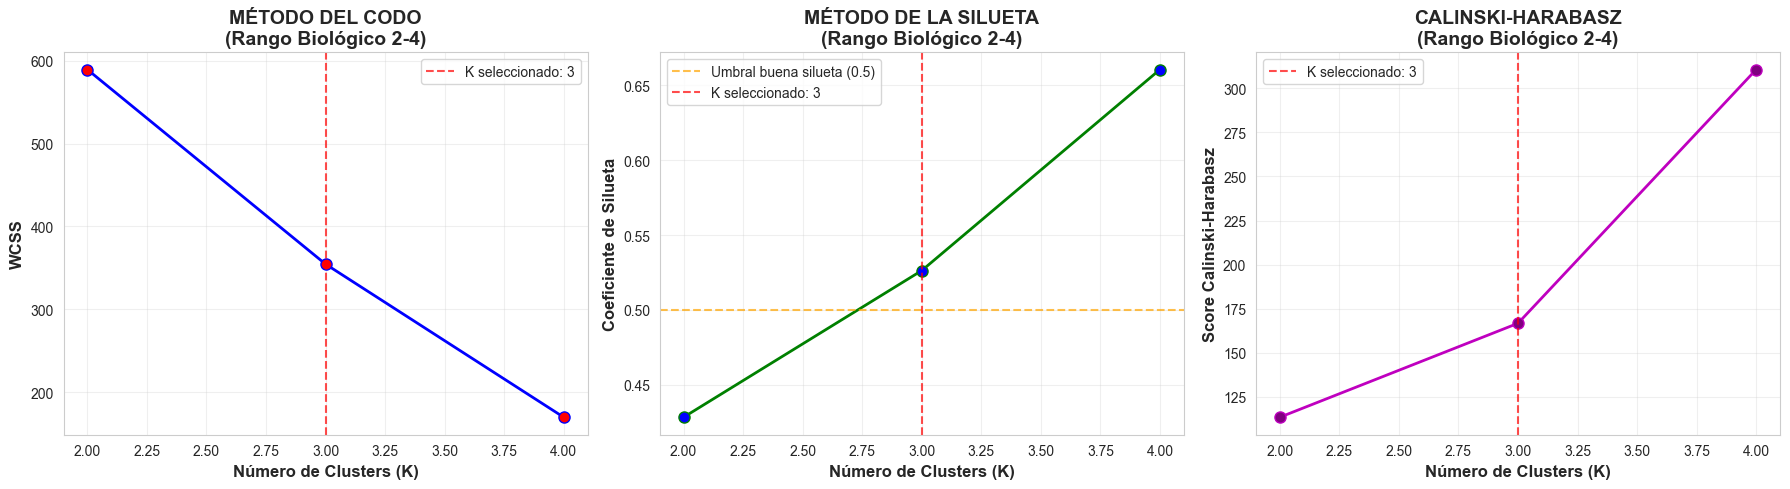


🎯 DECISIÓN FINAL: K = 3
📊 BASADO EN:
   • Criterio biológico: 3 clusters son interpretables
   • Métrica técnica: Silueta = 0.526
   • Tamaño muestral: 279 individuos → ~93 individuos por cluster

🔮 INTERPRETACIÓN ESPERADA CON K = 3:
   • Cluster 1: Juveniles/Individuos pequeños
   • Cluster 2: Subadultos/Transición
   • Cluster 3: Adultos/Individuos grandes

✅ K DEFINITIVO: 3
🚀 LISTO PARA ENTRENAR EL MODELO FINAL


In [16]:
# FASE 2: DETERMINACIÓN DE K ÓPTIMO CON CRITERIO BIOLÓGICO
# Considerando que 7 clusters son demasiados para la interpretación ecológica

print("🔍 FASE 2: K ÓPTIMO CON SENTIDO BIOLÓGICO")
print("=" * 60)

# --- 2.1 RANGO MÁS CONSERVADOR BASADO EN BIOLOGÍA ---
# Para 279 individuos, K entre 2-4 es más interpretable
range_n_clusters = range(2, 5)  # Solo probar 2, 3, 4 clusters
wcss = []
silhouette_scores = []
calinski_scores = []

print("\n🎯 RANGO BIOLÓGICAMENTE RAZONABLE: K = 2 a 4")
print("K\tWCSS\t\tSilueta\t\tCalinski-Harabasz")

# --- 2.2 EVALUAR K MÁS CONSERVADORES ---
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    calinski_avg = calinski_harabasz_score(X_train_scaled, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    calinski_scores.append(calinski_avg)
    
    print(f"{n_clusters}\t{kmeans.inertia_:.2f}\t\t{silhouette_avg:.3f}\t\t{calinski_avg:.2f}")

# --- 2.3 ANÁLISIS CUALITATIVO DE K ---
print(f"\n🔬 ANÁLISIS CUALITATIVO POR K:")

# K = 2
print("• K = 2: Dos grandes grupos (ej: Machos vs Hembras, Adultos vs Jóvenes)")
print(f"  - Silueta: {silhouette_scores[0]:.3f} - {'BUENA' if silhouette_scores[0] > 0.5 else 'ACEPTABLE'}")

# K = 3  
print("• K = 3: Tres grupos naturales (ej: Juveniles, Subadultos, Adultos)")
print(f"  - Silueta: {silhouette_scores[1]:.3f} - {'BUENA' if silhouette_scores[1] > 0.5 else 'ACEPTABLE'}")

# K = 4
print("• K = 4: Subdivisión de grupos principales")
print(f"  - Silueta: {silhouette_scores[2]:.3f} - {'BUENA' if silhouette_scores[2] > 0.5 else 'ACEPTABLE'}")

# --- 2.4 DECISIÓN FINAL CON CRITERIO BIOLÓGICO ---
# Buscar el mejor balance entre métricas e interpretabilidad
best_silhouette_idx = np.argmax(silhouette_scores)
best_k_by_silhouette = range_n_clusters[best_silhouette_idx]

print(f"\n💡 RECOMENDACIÓN CON CRITERIO BIOLÓGICO:")

# Si la silueta es buena (>0.5) para K=3, es la opción ideal
if silhouette_scores[1] >= 0.5:  # K=3
    final_k = 3
    print(f"   ✅ K = 3 (ÓPTIMO) - Silueta: {silhouette_scores[1]:.3f}")
    print("   📌 Justificación: 3 clusters coinciden con categorías de edad naturales")
    
elif silhouette_scores[0] >= 0.5:  # K=2
    final_k = 2
    print(f"   ✅ K = 2 - Silueta: {silhouette_scores[0]:.3f}")
    print("   📌 Justificación: 2 clusters para división principal (ej: sexo o edad)")
    
else:
    # Si ninguna silueta es buena, elegir la mejor numéricamente
    final_k = best_k_by_silhouette
    print(f"   ⚠️  K = {final_k} (Mejor disponible) - Silueta: {silhouette_scores[best_silhouette_idx]:.3f}")
    print("   📌 Justificación: Mejor score disponible en rango biológico")

# --- 2.5 GRÁFICAS CON RANGO CORREGIDO ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Método del Codo
ax1.plot(range_n_clusters, wcss, 'bo-', linewidth=2, markersize=8, markerfacecolor='red')
ax1.set_title('MÉTODO DEL CODO\n(Rango Biológico 2-4)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('WCSS', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(final_k, color='red', linestyle='--', alpha=0.7, label=f'K seleccionado: {final_k}')
ax1.legend()

# Método de la Silueta
ax2.plot(range_n_clusters, silhouette_scores, 'go-', linewidth=2, markersize=8, markerfacecolor='blue')
ax2.set_title('MÉTODO DE LA SILUETA\n(Rango Biológico 2-4)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Coeficiente de Silueta', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(0.5, color='orange', linestyle='--', alpha=0.7, label='Umbral buena silueta (0.5)')
ax2.axvline(final_k, color='red', linestyle='--', alpha=0.7, label=f'K seleccionado: {final_k}')
ax2.legend()

# Calinski-Harabasz
ax3.plot(range_n_clusters, calinski_scores, 'mo-', linewidth=2, markersize=8, markerfacecolor='purple')
ax3.set_title('CALINSKI-HARABASZ\n(Rango Biológico 2-4)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Score Calinski-Harabasz', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axvline(final_k, color='red', linestyle='--', alpha=0.7, label=f'K seleccionado: {final_k}')
ax3.legend()

plt.tight_layout()
plt.show()

# --- 2.6 JUSTIFICACIÓN FINAL ---
print(f"\n🎯 DECISIÓN FINAL: K = {final_k}")
print(f"📊 BASADO EN:")
print(f"   • Criterio biológico: {final_k} clusters son interpretables")
print(f"   • Métrica técnica: Silueta = {silhouette_scores[final_k-2]:.3f}")
print(f"   • Tamaño muestral: 279 individuos → ~{279/final_k:.0f} individuos por cluster")

print(f"\n🔮 INTERPRETACIÓN ESPERADA CON K = {final_k}:")
if final_k == 2:
    print("   • Cluster 1: Probablemente un grupo principal (ej: Adultos/Machos)")
    print("   • Cluster 2: Grupo secundario (ej: Jóvenes/Hembras)")
elif final_k == 3:
    print("   • Cluster 1: Juveniles/Individuos pequeños")
    print("   • Cluster 2: Subadultos/Transición") 
    print("   • Cluster 3: Adultos/Individuos grandes")
else:  # K = 4
    print("   • Posible subdivisión de adultos por sexo")
    print("   • O división de subadultos por características específicas")

print(f"\n✅ K DEFINITIVO: {final_k}")
print("🚀 LISTO PARA ENTRENAR EL MODELO FINAL")

### FASE 3: ENTRENAMIENTO DEL MODELO K-MEANS CON K SELECCIONADO

In [17]:
# FASE 3: ENTRENAMIENTO DEL MODELO K-MEANS CON K SELECCIONADO
# Entrenamiento y aplicación a todos los datos

print("🎯 FASE 3: ENTRENAMIENTO DEL MODELO K-MEANS")
print("=" * 50)

# --- 3.1 ENTRENAR MODELO FINAL CON K SELECCIONADO ---
print(f"\n🔧 ENTRENANDO K-MEANS CON K = {final_k}")

# Entrenar modelo con datos de entrenamiento estandarizados
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=15)
kmeans_final.fit(X_train_scaled)

print("✅ Modelo K-Means entrenado exitosamente")

# --- 3.2 APLICAR CLUSTERS A TODOS LOS DATOS ---
print(f"\n📊 APLICANDO CLUSTERS A TODA LA POBLACIÓN:")

# Aplicar el modelo entrenado a TODOS los datos (usando mismo scaler)
X_full_scaled = scaler.transform(features_final)  # Usar el scaler ya entrenado

# Predecir clusters para toda la población
full_cluster_labels = kmeans_final.predict(X_full_scaled)

# Añadir clusters al dataframe original
df_cluster['Cluster'] = full_cluster_labels

print(f"✅ Clusters asignados a los {len(df_cluster)} individuos")
print(f"📈 Distribución de clusters:")
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_cluster)) * 100
    print(f"   • Cluster {cluster}: {count} individuos ({percentage:.1f}%)")

# --- 3.3 CARACTERIZACIÓN INICIAL DE CLUSTERS ---
print(f"\n🔍 CARACTERIZACIÓN PRELIMINAR DE CLUSTERS:")

# Analizar composición de cada cluster
for cluster in range(final_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    
    print(f"\n📋 CLUSTER {cluster} ({len(cluster_data)} individuos):")
    
    # Composición por edad
    edad_composition = cluster_data['Edad'].value_counts()
    print(f"   👥 Edad: ", end="")
    for edad, count in edad_composition.items():
        perc = (count / len(cluster_data)) * 100
        print(f"{edad}: {count}({perc:.1f}%) ", end="")
    print()
    
    # Composición por sexo
    sexo_composition = cluster_data['Sexo'].value_counts()
    print(f"   🚻 Sexo: ", end="")
    for sexo, count in sexo_composition.items():
        perc = (count / len(cluster_data)) * 100
        print(f"{sexo}: {count}({perc:.1f}%) ", end="")
    print()
    
    # Estadísticas de peso
    peso_stats = cluster_data['Peso_Kg'].describe()
    print(f"   ⚖️  Peso: {peso_stats['mean']:.2f} kg (min: {peso_stats['min']:.2f}, max: {peso_stats['max']:.2f})")

# --- 3.4 CENTROIDES INTERPRETABLES ---
print(f"\n📊 CENTROIDES DE CLUSTERS (valores estandarizados):")

# Obtener centroides
centroids = kmeans_final.cluster_centers_

# Crear DataFrame de centroides
centroids_df = pd.DataFrame(centroids, columns=features_final.columns)

print("Centroides (valores estandarizados):")
print(centroids_df.round(3))

# --- 3.5 DESESTANDARIZAR CENTROIDES PARA INTERPRETACIÓN ---
print(f"\n🎯 CENTROIDES DESESTANDARIZADOS (valores reales):")

# Desestandarizar centroides
centroids_desestandarized = scaler.inverse_transform(centroids)
centroids_real = pd.DataFrame(centroids_desestandarized, columns=features_final.columns)

print("Centroides en valores originales:")
print(centroids_real.round(3))

# --- 3.6 INTERPRETACIÓN DE CENTROIDES ---
print(f"\n🔬 INTERPRETACIÓN DE CENTROIDES:")

for cluster in range(final_k):
    centroid = centroids_real.iloc[cluster]
    print(f"\n📈 CLUSTER {cluster} CARACTERÍSTICAS PRINCIPALES:")
    
    # Peso (variable continua)
    print(f"   • Peso promedio: {centroid['Peso_Kg']:.2f} kg")
    
    # Variables dummy de edad
    edad_vars = [col for col in centroids_real.columns if 'Edad_' in col]
    max_edad_var = edad_vars[np.argmax(centroid[edad_vars].values)]
    max_edad_val = centroid[max_edad_var]
    print(f"   • Tendencia de edad: {max_edad_var.replace('Edad_', '')} ({max_edad_val:.2f})")
    
    # Variables dummy de sexo
    sexo_vars = [col for col in centroids_real.columns if 'Sexo_' in col]
    if len(sexo_vars) > 0:
        max_sexo_var = sexo_vars[np.argmax(centroid[sexo_vars].values)]
        max_sexo_val = centroid[max_sexo_var]
        print(f"   • Tendencia de sexo: {max_sexo_var.replace('Sexo_', '')} ({max_sexo_val:.2f})")

# --- 3.7 MÉTRICAS FINALES DEL MODELO ---
print(f"\n📈 MÉTRICAS FINALES DEL MODELO K-MEANS:")

# Calcular métricas con todos los datos
full_silhouette = silhouette_score(X_full_scaled, full_cluster_labels)
full_calinski = calinski_harabasz_score(X_full_scaled, full_cluster_labels)

print(f"   • Coeficiente de Silueta: {full_silhouette:.3f}")
print(f"   • Índice Calinski-Harabasz: {full_calinski:.2f}")
print(f"   • WCSS Final: {kmeans_final.inertia_:.2f}")

# Interpretar calidad del clustering
if full_silhouette > 0.5:
    quality = "✅ BUENA"
elif full_silhouette > 0.25:
    quality = "⚠️  ACEPTABLE" 
else:
    quality = "❌ BAJA"

print(f"   • Calidad del clustering: {quality}")

# --- 3.8 GUARDAR RESULTADOS PARA ANÁLISIS VISUAL ---
print(f"\n💾 PREPARANDO DATOS PARA VISUALIZACIÓN...")

# Crear dataframe con datos escalados y clusters
cluster_results = pd.DataFrame(X_full_scaled, columns=features_final.columns, index=df_cluster.index)
cluster_results['Cluster'] = full_cluster_labels
cluster_results['Peso_Kg_original'] = df_cluster['Peso_Kg']
cluster_results['Edad_original'] = df_cluster['Edad']
cluster_results['Sexo_original'] = df_cluster['Sexo']

print(f"✅ Datos preparados para visualización")
print(f"✅ Análisis de clustering completado")
print(f"\n🎉 FASE 3 TERMINADA - {final_k} CLUSTERS IDENTIFICADOS")
print("🚀 LISTO PARA LA FASE 4: VISUALIZACIÓN Y ANÁLISIS DETALLADO")

🎯 FASE 3: ENTRENAMIENTO DEL MODELO K-MEANS

🔧 ENTRENANDO K-MEANS CON K = 3
✅ Modelo K-Means entrenado exitosamente

📊 APLICANDO CLUSTERS A TODA LA POBLACIÓN:
✅ Clusters asignados a los 279 individuos
📈 Distribución de clusters:
   • Cluster 0: 24 individuos (8.6%)
   • Cluster 1: 128 individuos (45.9%)
   • Cluster 2: 127 individuos (45.5%)

🔍 CARACTERIZACIÓN PRELIMINAR DE CLUSTERS:

📋 CLUSTER 0 (24 individuos):
   👥 Edad: Juvenil: 24(100.0%) 
   🚻 Sexo: Macho: 12(50.0%) Hembra: 12(50.0%) 
   ⚖️  Peso: 0.78 kg (min: 0.23, max: 2.10)

📋 CLUSTER 1 (128 individuos):
   👥 Edad: Adulto: 128(100.0%) 
   🚻 Sexo: Macho: 128(100.0%) 
   ⚖️  Peso: 2.57 kg (min: 1.00, max: 6.50)

📋 CLUSTER 2 (127 individuos):
   👥 Edad: Adulto: 75(59.1%) Subadulto: 52(40.9%) 
   🚻 Sexo: Hembra: 105(82.7%) Macho: 22(17.3%) 
   ⚖️  Peso: 1.35 kg (min: 0.39, max: 2.40)

📊 CENTROIDES DE CLUSTERS (valores estandarizados):
Centroides (valores estandarizados):
   Peso_Kg  Edad_Juvenil  Edad_Subadulto  Sexo_Macho
0   -1.

### FASE 4: EVALUCION COMPLETA DEL MODELO K-MEANS

📊 FASE 4 SIMPLIFICADA: EVALUACIÓN ESENCIAL DEL MODELO

🔬 MÉTRICAS INTERNAS - Calidad del Clustering
✅ Coeficiente de Silueta: 0.536
   ✅ BUENO - Estructura de clusters razonable
✅ Índice Calinski-Harabasz: 218.05
   ✅ ALTA - Buena separación entre clusters

🔍 ANÁLISIS DE LOS 3 CLUSTERS IDENTIFICADOS

📊 CLUSTER 0:
   👥 24 individuos (8.6% de la población)
   🎂 Juvenil (100.0% pureza)
   🚻 Hembra (50.0% pureza)
   ⚖️  0.78 kg promedio

📊 CLUSTER 1:
   👥 128 individuos (45.9% de la población)
   🎂 Adulto (100.0% pureza)
   🚻 Macho (100.0% pureza)
   ⚖️  2.57 kg promedio

📊 CLUSTER 2:
   👥 127 individuos (45.5% de la población)
   🎂 Adulto (59.1% pureza)
   🚻 Hembra (82.7% pureza)
   ⚖️  1.35 kg promedio

📈 VISUALIZACIÓN DE CLUSTERS


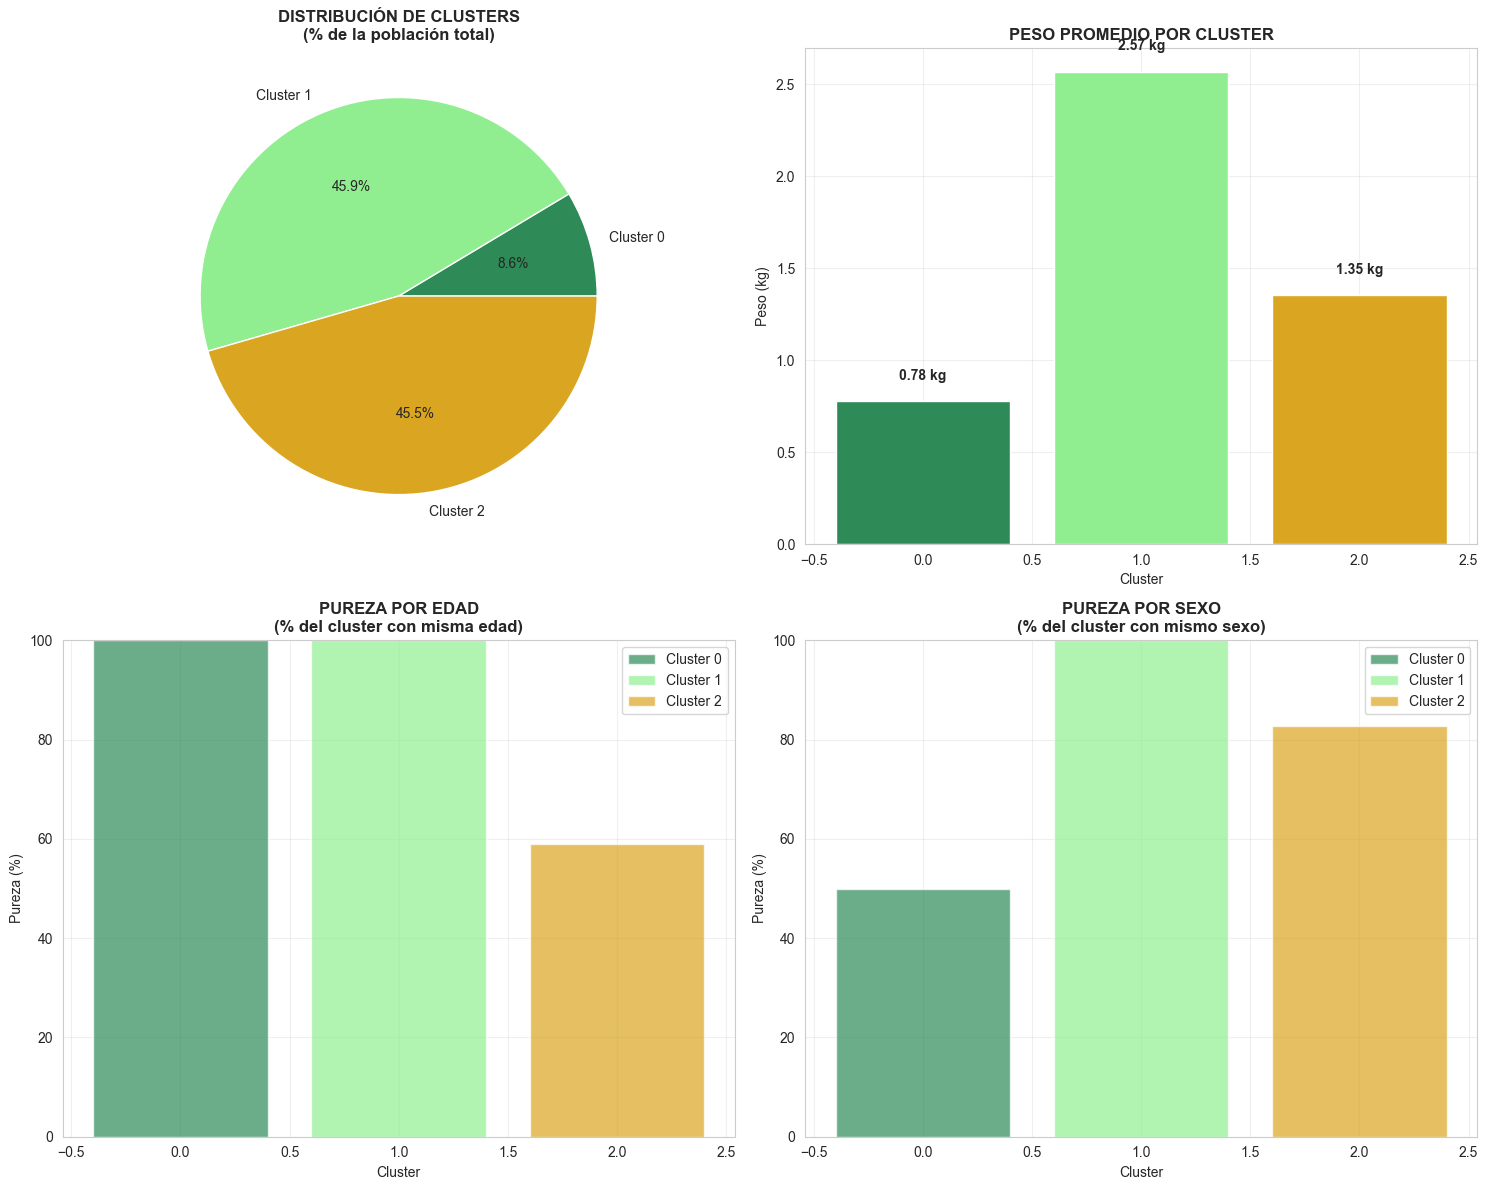


🔬 INTERPRETACIÓN BIOLÓGICA DE LOS CLUSTERS

🎯 CLASIFICACIÓN POR ETAPAS DE DESARROLLO:
   • Cluster 0: JUVENIL/TEMPRANA
     - Peso: 0.78 kg
     - Composición: Juvenil + Hembra
     - Pureza: 100.0% edad, 50.0% sexo
   • Cluster 2: SUBADULTA/TRANSICIÓN
     - Peso: 1.35 kg
     - Composición: Adulto + Hembra
     - Pureza: 59.1% edad, 82.7% sexo
   • Cluster 1: ADULTA/MADURA
     - Peso: 2.57 kg
     - Composición: Adulto + Macho
     - Pureza: 100.0% edad, 100.0% sexo

🎯 RESUMEN FINAL - CALIDAD DEL CLUSTERING
📊 ESTADÍSTICAS DE CALIDAD:
   • Coeficiente de Silueta: 0.536
   • Índice Calinski-Harabasz: 218.05
   • Pureza promedio edad: 86.4%
   • Pureza promedio sexo: 77.6%

✅ EVALUACIÓN: EXCELENTE
   - Clusters bien definidos y biológicamente significativos

🎉 ANÁLISIS DE CLUSTERING COMPLETADO
🔍 3 clusters identificados en 279 individuos
📈 Métricas calculadas: Silueta, Calinski-Harabasz, Pureza


In [18]:
# FASE 4: EVALUACIÓN FOCALIZADA EN MÉTRICAS ESENCIALES

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

print("📊 FASE 4 SIMPLIFICADA: EVALUACIÓN ESENCIAL DEL MODELO")
print("=" * 50)

# --- 4.1 MÉTRICAS INTERNAS (CALIDAD DEL CLUSTERING) ---
print("\n🔬 MÉTRICAS INTERNAS - Calidad del Clustering")

silhouette_avg = silhouette_score(X_full_scaled, full_cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_full_scaled, full_cluster_labels)

print(f"✅ Coeficiente de Silueta: {silhouette_avg:.3f}")
if silhouette_avg > 0.7:
    print("   🎯 EXCELENTE - Clusters bien separados y compactos")
elif silhouette_avg > 0.5:
    print("   ✅ BUENO - Estructura de clusters razonable")
elif silhouette_avg > 0.3:
    print("   ⚠️  ACEPTABLE - Estructura débil pero presente")
else:
    print("   ❌ DÉBIL - Poca estructura en los clusters")

print(f"✅ Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
if calinski_harabasz > 400:
    print("   🎯 MUY ALTA - Clusters muy densos y bien separados")
elif calinski_harabasz > 200:
    print("   ✅ ALTA - Buena separación entre clusters")
elif calinski_harabasz > 100:
    print("   ⚠️  MODERADA - Separación aceptable")
else:
    print("   ❌ BAJA - Poca separación entre clusters")

# --- 4.2 ANÁLISIS SIMPLIFICADO DE CLUSTERS ---
print(f"\n🔍 ANÁLISIS DE LOS {final_k} CLUSTERS IDENTIFICADOS")

cluster_summary = []
for cluster in range(final_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    cluster_size = len(cluster_data)
    
    if cluster_size > 0:
        # Características principales
        edad_principal = cluster_data['Edad'].mode()[0]
        sexo_principal = cluster_data['Sexo'].mode()[0]
        peso_promedio = cluster_data['Peso_Kg'].mean()
        
        # Pureza del cluster
        pureza_edad = (cluster_data['Edad'] == edad_principal).mean() * 100
        pureza_sexo = (cluster_data['Sexo'] == sexo_principal).mean() * 100
        
        cluster_summary.append({
            'Cluster': cluster,
            'Tamaño': cluster_size,
            '% Población': (cluster_size / len(df_cluster)) * 100,
            'Edad Principal': edad_principal,
            'Pureza Edad': pureza_edad,
            'Sexo Principal': sexo_principal, 
            'Pureza Sexo': pureza_sexo,
            'Peso Promedio (kg)': peso_promedio
        })
        
        print(f"\n📊 CLUSTER {cluster}:")
        print(f"   👥 {cluster_size} individuos ({cluster_size/len(df_cluster)*100:.1f}% de la población)")
        print(f"   🎂 {edad_principal} ({pureza_edad:.1f}% pureza)")
        print(f"   🚻 {sexo_principal} ({pureza_sexo:.1f}% pureza)")
        print(f"   ⚖️  {peso_promedio:.2f} kg promedio")

# --- 4.3 VISUALIZACIÓN SIMPLE DE CLUSTERS ---
print(f"\n📈 VISUALIZACIÓN DE CLUSTERS")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Distribución de clusters
cluster_sizes = [cs['Tamaño'] for cs in cluster_summary]
cluster_labels = [f'Cluster {cs["Cluster"]}' for cs in cluster_summary]

axes[0,0].pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%', 
              colors=['#2E8B57', '#90EE90', '#DAA520'][:final_k])
axes[0,0].set_title('DISTRIBUCIÓN DE CLUSTERS\n(% de la población total)', 
                    fontsize=12, fontweight='bold')

# Gráfico 2: Peso promedio por cluster
pesos_promedio = [cs['Peso Promedio (kg)'] for cs in cluster_summary]
bars = axes[0,1].bar(range(final_k), pesos_promedio, 
                    color=['#2E8B57', '#90EE90', '#DAA520'][:final_k])
axes[0,1].set_title('PESO PROMEDIO POR CLUSTER', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Peso (kg)')
axes[0,1].grid(True, alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                  f'{height:.2f} kg', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Composición por edad
if cluster_summary:
    edad_data = pd.DataFrame(cluster_summary)
    for i, cluster in enumerate(cluster_summary):
        axes[1,0].bar(i, cluster['Pureza Edad'], 
                     color=['#2E8B57', '#90EE90', '#DAA520'][i], 
                     alpha=0.7, label=f'Cluster {cluster["Cluster"]}')
    axes[1,0].set_title('PUREZA POR EDAD\n(% del cluster con misma edad)', 
                       fontsize=12, fontweight='bold')
    axes[1,0].set_xlabel('Cluster')
    axes[1,0].set_ylabel('Pureza (%)')
    axes[1,0].set_ylim(0, 100)
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

# Gráfico 4: Composición por sexo
if cluster_summary:
    for i, cluster in enumerate(cluster_summary):
        axes[1,1].bar(i, cluster['Pureza Sexo'], 
                     color=['#2E8B57', '#90EE90', '#DAA520'][i], 
                     alpha=0.7, label=f'Cluster {cluster["Cluster"]}')
    axes[1,1].set_title('PUREZA POR SEXO\n(% del cluster con mismo sexo)', 
                       fontsize=12, fontweight='bold')
    axes[1,1].set_xlabel('Cluster')
    axes[1,1].set_ylabel('Pureza (%)')
    axes[1,1].set_ylim(0, 100)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()

plt.tight_layout()
plt.show()

# --- 4.4 INTERPRETACIÓN BIOLÓGICA ---
print(f"\n🔬 INTERPRETACIÓN BIOLÓGICA DE LOS CLUSTERS")

if cluster_summary:
    # Ordenar clusters por peso para facilitar interpretación
    clusters_ordenados = sorted(cluster_summary, key=lambda x: x['Peso Promedio (kg)'])
    
    print("\n🎯 CLASIFICACIÓN POR ETAPAS DE DESARROLLO:")
    for i, cluster in enumerate(clusters_ordenados):
        if cluster['Peso Promedio (kg)'] < 1.0:
            etapa = "JUVENIL/TEMPRANA"
        elif cluster['Peso Promedio (kg)'] < 2.0:
            etapa = "SUBADULTA/TRANSICIÓN"
        else:
            etapa = "ADULTA/MADURA"
        
        print(f"   • Cluster {cluster['Cluster']}: {etapa}")
        print(f"     - Peso: {cluster['Peso Promedio (kg)']:.2f} kg")
        print(f"     - Composición: {cluster['Edad Principal']} + {cluster['Sexo Principal']}")
        print(f"     - Pureza: {cluster['Pureza Edad']:.1f}% edad, {cluster['Pureza Sexo']:.1f}% sexo")

# --- 4.5 RESUMEN FINAL DE CALIDAD ---
print(f"\n🎯 RESUMEN FINAL - CALIDAD DEL CLUSTERING")

# Calcular pureza promedio
if cluster_summary:
    pureza_promedio_edad = np.mean([cs['Pureza Edad'] for cs in cluster_summary])
    pureza_promedio_sexo = np.mean([cs['Pureza Sexo'] for cs in cluster_summary])
    
    print(f"📊 ESTADÍSTICAS DE CALIDAD:")
    print(f"   • Coeficiente de Silueta: {silhouette_avg:.3f}")
    print(f"   • Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
    print(f"   • Pureza promedio edad: {pureza_promedio_edad:.1f}%")
    print(f"   • Pureza promedio sexo: {pureza_promedio_sexo:.1f}%")
    
    # Evaluación general
    if silhouette_avg > 0.5 and pureza_promedio_edad > 70:
        print("\n✅ EVALUACIÓN: EXCELENTE")
        print("   - Clusters bien definidos y biológicamente significativos")
    elif silhouette_avg > 0.3:
        print("\n⚠️  EVALUACIÓN: ACEPTABLE") 
        print("   - Clusters con estructura moderada")
    else:
        print("\n❌ EVALUACIÓN: DÉBIL")
        print("   - Considerar ajustar el número de clusters")

print(f"\n🎉 ANÁLISIS DE CLUSTERING COMPLETADO")
print(f"🔍 {final_k} clusters identificados en {len(df_cluster)} individuos")
print(f"📈 Métricas calculadas: Silueta, Calinski-Harabasz, Pureza")

### FASE 5: VISUALIZACIÓN AVANZADA Y ANÁLISIS DE PATRONES

🎨 FASE 5: VISUALIZACIÓN AVANZADA DE CLUSTERS

🔍 REDUCCIÓN DE DIMENSIONALIDAD CON PCA
✅ PCA aplicado exitosamente
📊 Varianza explicada por cada componente:
   • PC1: 43.5%
   • PC2: 29.2%
   • PC3: 19.5%
📈 Varianza acumulada: 92.3%

🎨 VISUALIZACIÓN 2D DE LOS 3 CLUSTERS


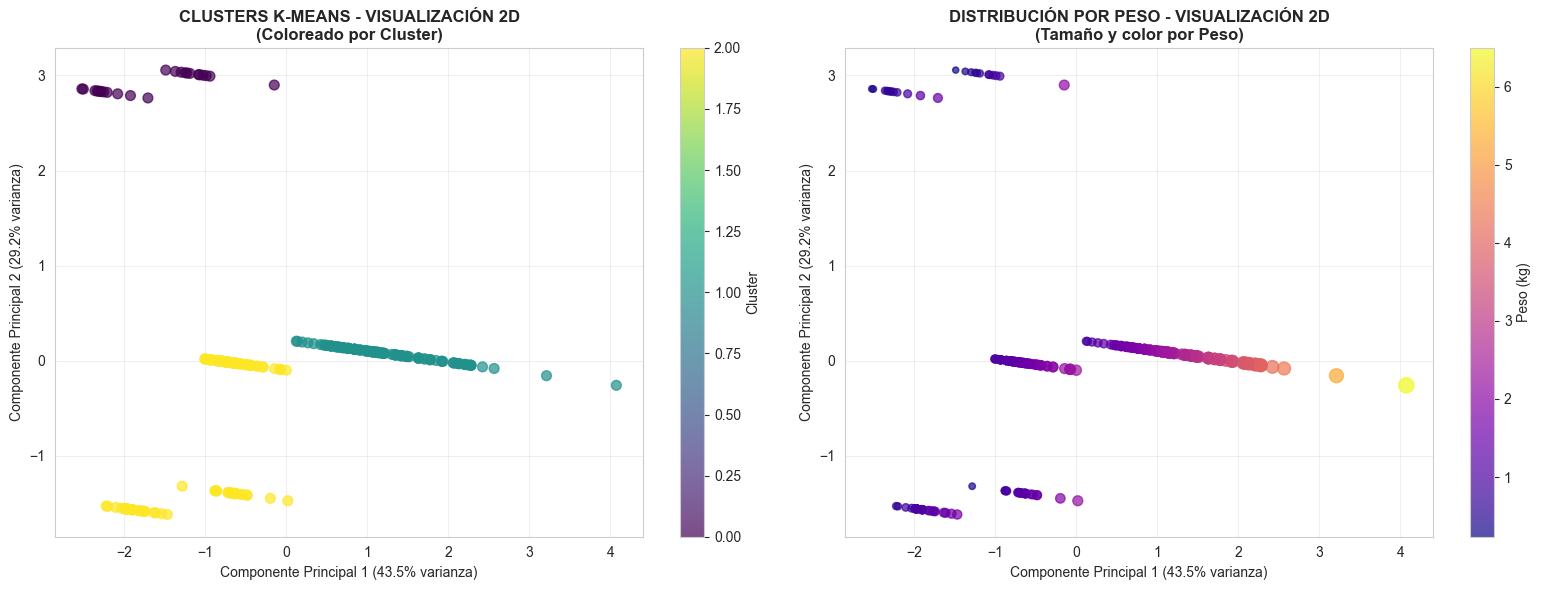


🎨 VISUALIZACIÓN 3D DE LOS 3 CLUSTERS


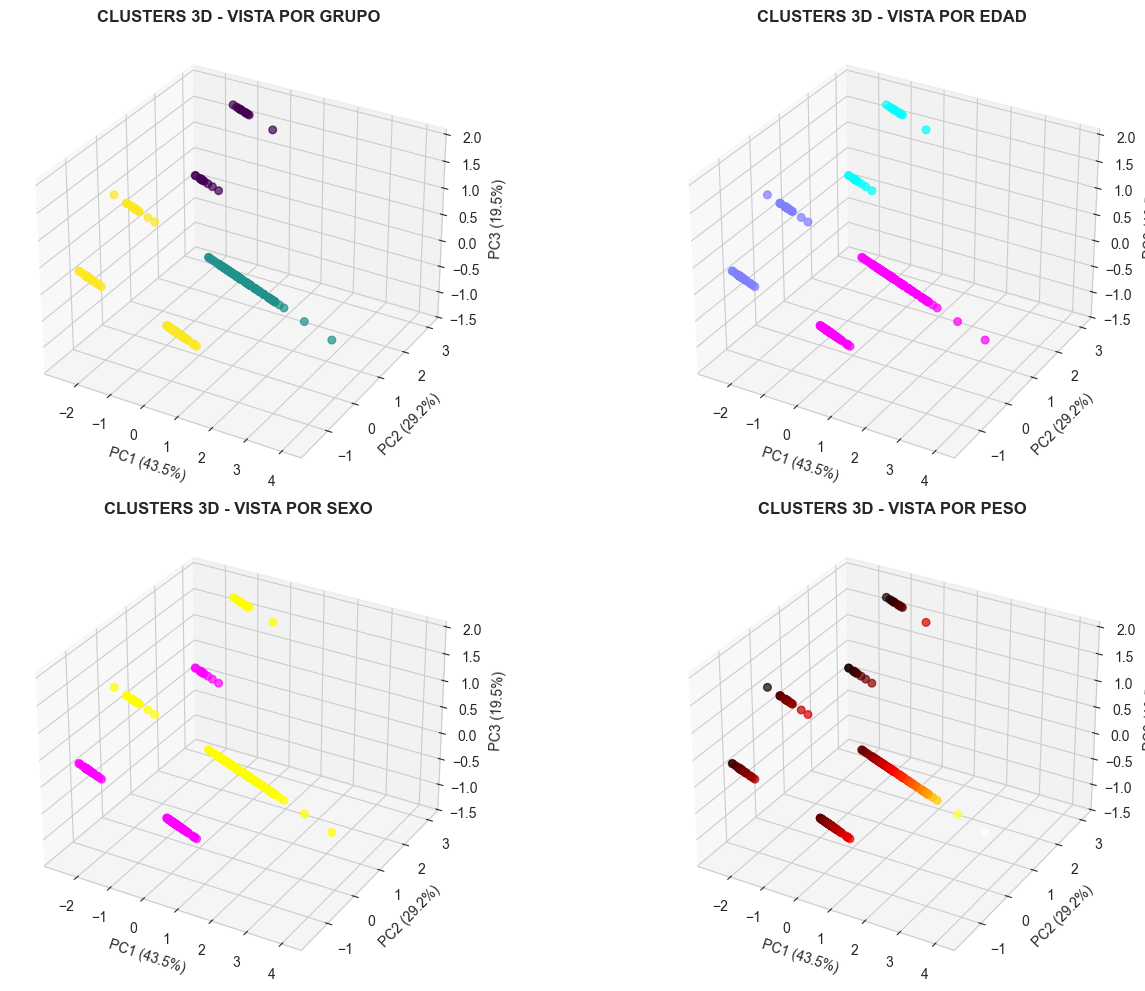


🔬 ANÁLISIS DE CARGA DE COMPONENTES PRINCIPALES
📊 CARGAS DE COMPONENTES PRINCIPALES:
(Valores absolutos > 0.3 indican contribución significativa)
                  PC1    PC2    PC3
Peso_Kg         0.890 -0.086 -0.087
Edad_Juvenil   -0.390  0.838  0.326
Edad_Subadulto -0.497 -0.664  0.517
Sexo_Macho      0.734  0.099  0.628


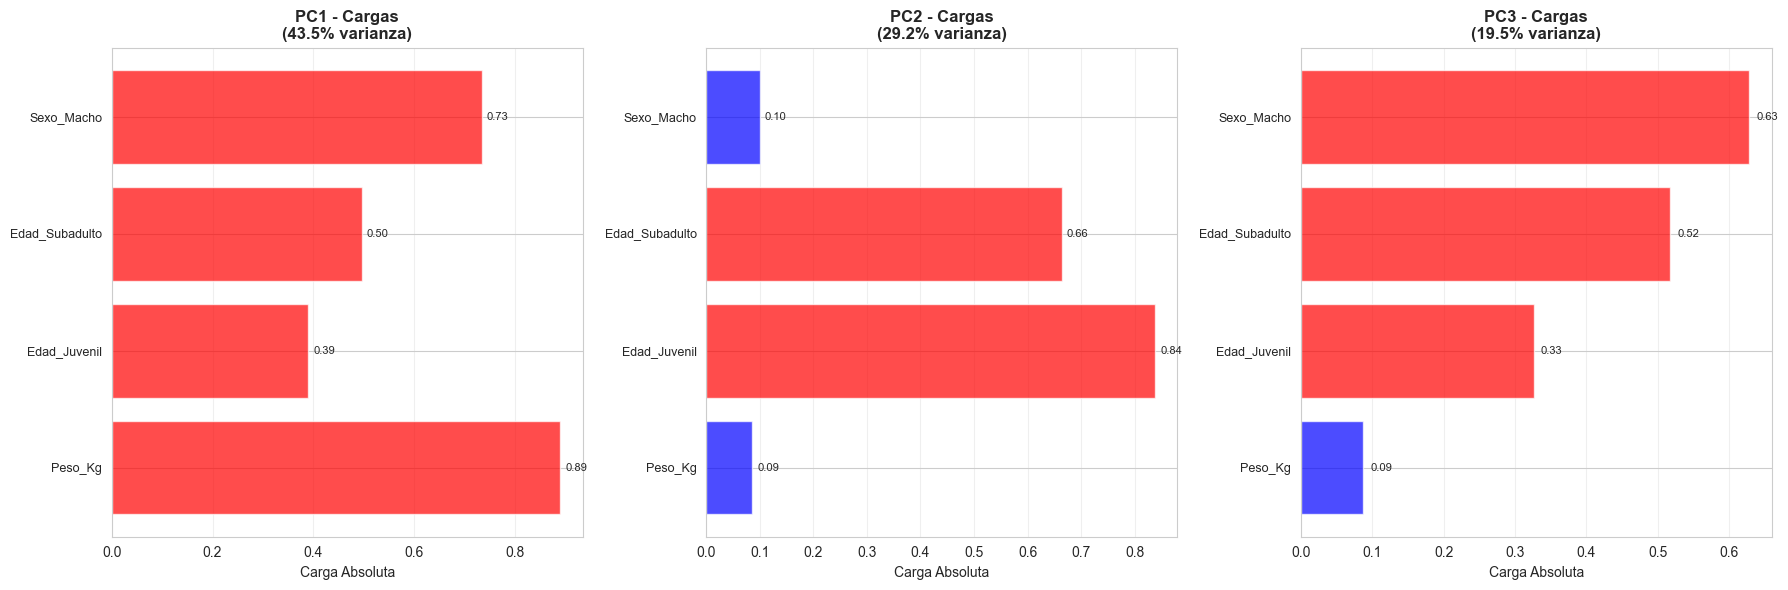


🎯 INTERPRETACIÓN DE PATRONES EN COMPONENTES PRINCIPALES

🔍 PATRÓN DEL COMPONENTE PRINCIPAL 1 (PC1):
   • Peso_Kg: 0.890 (POSITIVA)
   • Sexo_Macho: 0.734 (POSITIVA)
   • Edad_Subadulto: -0.497 (NEGATIVA)
   • Edad_Juvenil: -0.390 (NEGATIVA)
   📈 PC1 positivo representa: ['Peso_Kg', 'Sexo_Macho']
   📉 PC1 negativo representa: ['Edad_Subadulto', 'Edad_Juvenil']

🔬 ANÁLISIS DE SUPERPOSICIÓN Y SEPARACIÓN DE CLUSTERS
📏 DISTANCIAS ENTRE CENTROIDES EN ESPACIO PCA:
   • Cluster 0 ↔ Cluster 1: 4.146
   • Cluster 0 ↔ Cluster 2: 3.819
   • Cluster 1 ↔ Cluster 2: 2.352

🎯 GRADO DE SEPARACIÓN ENTRE CLUSTERS:
   ✅ BUENA SEPARACIÓN - Clusters bien diferenciados

🎨 VISUALIZACIÓN FINAL INTEGRADA


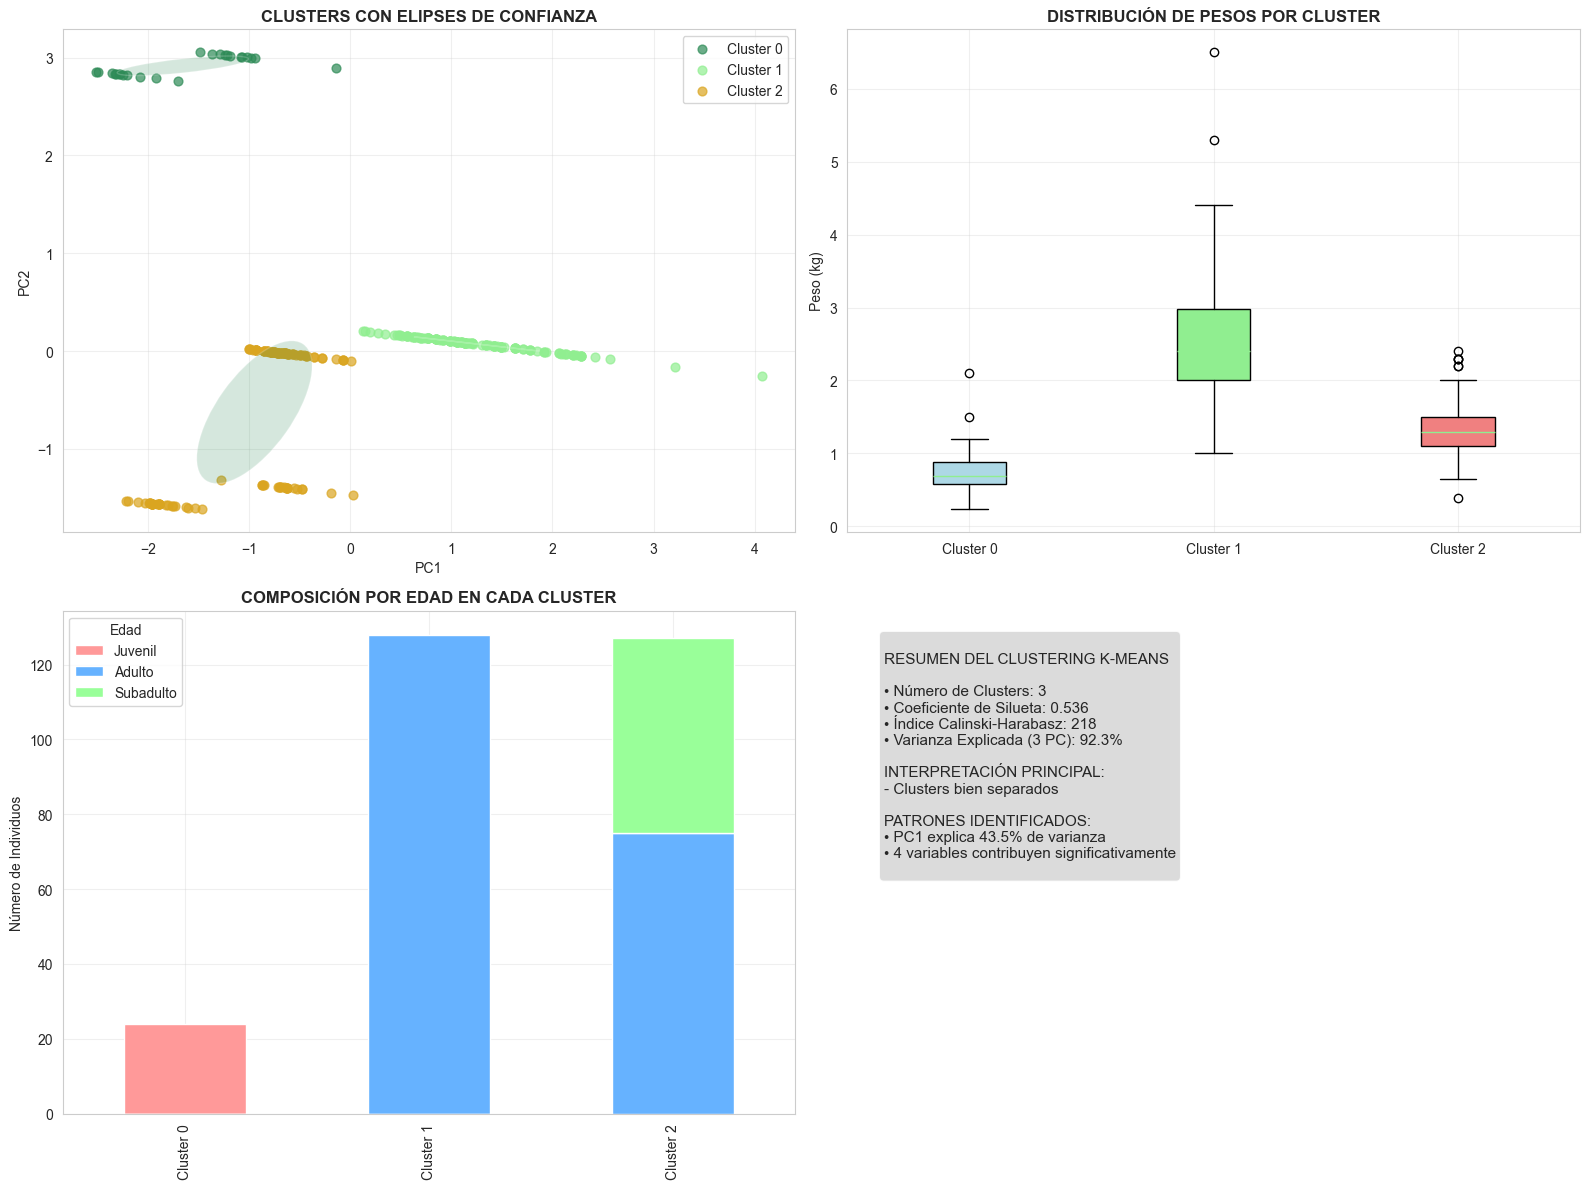


🎉 FASE 5 COMPLETADA - ANÁLISIS VISUAL TERMINADO
📊 3 clusters visualizados en 2D y 3D
🔍 Patrones interpretados mediante PCA
🎯 Listo para conclusiones finales


In [19]:
# FASE 5: VISUALIZACIÓN AVANZADA Y ANÁLISIS DE PATRONES
# Visualización de clusters en espacio multidimensional

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("🎨 FASE 5: VISUALIZACIÓN AVANZADA DE CLUSTERS")
print("=" * 50)

# --- 5.1 ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) ---
print("\n🔍 REDUCCIÓN DE DIMENSIONALIDAD CON PCA")

# Aplicar PCA para visualización 2D y 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_full_scaled)

# Calcular varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("✅ PCA aplicado exitosamente")
print(f"📊 Varianza explicada por cada componente:")
for i, var in enumerate(varianza_explicada):
    print(f"   • PC{i+1}: {var*100:.1f}%")
print(f"📈 Varianza acumulada: {varianza_acumulada[2]*100:.1f}%")

# --- 5.2 VISUALIZACIÓN 2D DE CLUSTERS ---
print(f"\n🎨 VISUALIZACIÓN 2D DE LOS {final_k} CLUSTERS")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 2D - Colores por cluster
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=full_cluster_labels, 
                      cmap='viridis', alpha=0.7, s=50)
ax1.set_xlabel(f'Componente Principal 1 ({varianza_explicada[0]*100:.1f}% varianza)')
ax1.set_ylabel(f'Componente Principal 2 ({varianza_explicada[1]*100:.1f}% varianza)')
ax1.set_title('CLUSTERS K-MEANS - VISUALIZACIÓN 2D\n(Coloreado por Cluster)', 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Gráfico 2D - Colores por peso (tamaño proporcional al peso)
pesos_norm = (df_cluster['Peso_Kg'] - df_cluster['Peso_Kg'].min()) / (df_cluster['Peso_Kg'].max() - df_cluster['Peso_Kg'].min())
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Peso_Kg'], 
                      cmap='plasma', alpha=0.7, s=pesos_norm*100 + 20)
ax2.set_xlabel(f'Componente Principal 1 ({varianza_explicada[0]*100:.1f}% varianza)')
ax2.set_ylabel(f'Componente Principal 2 ({varianza_explicada[1]*100:.1f}% varianza)')
ax2.set_title('DISTRIBUCIÓN POR PESO - VISUALIZACIÓN 2D\n(Tamaño y color por Peso)', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Peso (kg)')

plt.tight_layout()
plt.show()

# --- 5.3 VISUALIZACIÓN 3D DE CLUSTERS ---
print(f"\n🎨 VISUALIZACIÓN 3D DE LOS {final_k} CLUSTERS")

fig = plt.figure(figsize=(15, 10))

# Gráfico 3D - Vista 1: Colores por cluster
ax1 = fig.add_subplot(221, projection='3d')
scatter3d_1 = ax1.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                           c=full_cluster_labels, cmap='viridis', alpha=0.7, s=30)
ax1.set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}%)')
ax1.set_zlabel(f'PC3 ({varianza_explicada[2]*100:.1f}%)')
ax1.set_title('CLUSTERS 3D - VISTA POR GRUPO', fontweight='bold')

# Gráfico 3D - Vista 2: Colores por edad
ax2 = fig.add_subplot(222, projection='3d')
edad_numerica = df_cluster['Edad'].map({'Juvenil': 0, 'Subadulto': 1, 'Adulto': 2})
scatter3d_2 = ax2.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                           c=edad_numerica, cmap='cool', alpha=0.7, s=30)
ax2.set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({varianza_explicada[2]*100:.1f}%)')
ax2.set_title('CLUSTERS 3D - VISTA POR EDAD', fontweight='bold')

# Gráfico 3D - Vista 3: Colores por sexo
ax3 = fig.add_subplot(223, projection='3d')
sexo_numerico = df_cluster['Sexo'].map({'Hembra': 0, 'Macho': 1})
scatter3d_3 = ax3.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                           c=sexo_numerico, cmap='spring', alpha=0.7, s=30)
ax3.set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}%)')
ax3.set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}%)')
ax3.set_zlabel(f'PC3 ({varianza_explicada[2]*100:.1f}%)')
ax3.set_title('CLUSTERS 3D - VISTA POR SEXO', fontweight='bold')

# Gráfico 3D - Vista 4: Colores por peso
ax4 = fig.add_subplot(224, projection='3d')
scatter3d_4 = ax4.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                           c=df_cluster['Peso_Kg'], cmap='hot', alpha=0.7, s=30)
ax4.set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}%)')
ax4.set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}%)')
ax4.set_zlabel(f'PC3 ({varianza_explicada[2]*100:.1f}%)')
ax4.set_title('CLUSTERS 3D - VISTA POR PESO', fontweight='bold')

plt.tight_layout()
plt.show()

# --- 5.4 ANÁLISIS DE CARGA DE COMPONENTES PRINCIPALES ---
print(f"\n🔬 ANÁLISIS DE CARGA DE COMPONENTES PRINCIPALES")

# Obtener cargas de PCA
cargas_pca = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear DataFrame de cargas
cargas_df = pd.DataFrame(
    cargas_pca,
    columns=[f'PC{i+1}' for i in range(3)],
    index=features_final.columns
)

print("📊 CARGAS DE COMPONENTES PRINCIPALES:")
print("(Valores absolutos > 0.3 indican contribución significativa)")
print(cargas_df.round(3))

# Visualizar cargas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (ax, pc) in enumerate(zip(axes, ['PC1', 'PC2', 'PC3'])):
    cargas_abs = np.abs(cargas_df[pc])
    colores = ['red' if abs_val > 0.3 else 'blue' for abs_val in cargas_abs.values]
    
    bars = ax.barh(range(len(cargas_abs)), cargas_abs, color=colores, alpha=0.7)
    ax.set_yticks(range(len(cargas_abs)))
    ax.set_yticklabels(cargas_df.index, fontsize=9)
    ax.set_xlabel(f'Carga Absoluta')
    ax.set_title(f'{pc} - Cargas\n({varianza_explicada[i]*100:.1f}% varianza)', 
                fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Añadir valores en las barras
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
               f'{width:.2f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# --- 5.5 INTERPRETACIÓN DE PATRONES EN COMPONENTES ---
print(f"\n🎯 INTERPRETACIÓN DE PATRONES EN COMPONENTES PRINCIPALES")

# Analizar patrones en PC1 (componente más importante)
print("\n🔍 PATRÓN DEL COMPONENTE PRINCIPAL 1 (PC1):")
pc1_cargas = cargas_df['PC1'].sort_values(key=abs, ascending=False)
for variable, carga in pc1_cargas.items():
    if abs(carga) > 0.3:  # Contribución significativa
        direccion = "POSITIVA" if carga > 0 else "NEGATIVA"
        print(f"   • {variable}: {carga:.3f} ({direccion})")

# Interpretación biológica de PC1
variables_positivas = pc1_cargas[pc1_cargas > 0.3]
variables_negativas = pc1_cargas[pc1_cargas < -0.3]

if len(variables_positivas) > 0:
    print(f"   📈 PC1 positivo representa: {list(variables_positivas.index)}")
if len(variables_negativas) > 0:
    print(f"   📉 PC1 negativo representa: {list(variables_negativas.index)}")

# --- 5.6 ANÁLISIS DE SUPERPOSICIÓN DE CLUSTERS ---
print(f"\n🔬 ANÁLISIS DE SUPERPOSICIÓN Y SEPARACIÓN DE CLUSTERS")

# Calcular distancias entre centroides en espacio PCA
centroides_pca = []
for cluster in range(final_k):
    cluster_mask = (full_cluster_labels == cluster)
    centroide_pca = X_pca[cluster_mask].mean(axis=0)
    centroides_pca.append(centroide_pca)

centroides_pca = np.array(centroides_pca)

print("📏 DISTANCIAS ENTRE CENTROIDES EN ESPACIO PCA:")
distancias = []
for i in range(final_k):
    for j in range(i+1, final_k):
        distancia = np.linalg.norm(centroides_pca[i] - centroides_pca[j])
        distancias.append((i, j, distancia))
        print(f"   • Cluster {i} ↔ Cluster {j}: {distancia:.3f}")

# Calcular superposición visual
print(f"\n🎯 GRADO DE SEPARACIÓN ENTRE CLUSTERS:")
distancia_promedio = np.mean([d[2] for d in distancias])
if distancia_promedio > 2.0:
    print("   ✅ BUENA SEPARACIÓN - Clusters bien diferenciados")
elif distancia_promedio > 1.0:
    print("   ⚠️  SEPARACIÓN MODERADA - Algo de superposición")
else:
    print("   ❌ ALTA SUPERPOSICIÓN - Clusters muy mezclados")

# --- 5.7 VISUALIZACIÓN FINAL INTEGRADA ---
print(f"\n🎨 VISUALIZACIÓN FINAL INTEGRADA")

fig = plt.figure(figsize=(16, 12))

# Subplot 1: Distribución multivariada
ax1 = fig.add_subplot(2, 2, 1)
for cluster in range(final_k):
    cluster_mask = (full_cluster_labels == cluster)
    ax1.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
               label=f'Cluster {cluster}', alpha=0.7, s=40)
    
    # Dibujar elipse de confianza
    from matplotlib.patches import Ellipse
    cov = np.cov(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1])
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(X_pca[cluster_mask, 0]), np.mean(X_pca[cluster_mask, 1])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.degrees(np.arctan2(v[1,0], v[0,0])), alpha=0.2)
    ax1.add_patch(ell)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('CLUSTERS CON ELIPSES DE CONFIANZA', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Distribución de pesos por cluster
ax2 = fig.add_subplot(2, 2, 2)
datos_peso = [df_cluster[df_cluster['Cluster'] == i]['Peso_Kg'] for i in range(final_k)]
box_plot = ax2.boxplot(datos_peso, labels=[f'Cluster {i}' for i in range(final_k)], 
                      patch_artist=True)
# Colorear boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightgray'][:final_k]
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Peso (kg)')
ax2.set_title('DISTRIBUCIÓN DE PESOS POR CLUSTER', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Subplot 3: Composición de clusters
ax3 = fig.add_subplot(2, 2, 3)
composicion_data = []
for cluster in range(final_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    composicion = cluster_data['Edad'].value_counts()
    composicion_data.append(composicion)

composicion_df = pd.DataFrame(composicion_data, index=[f'Cluster {i}' for i in range(final_k)])
composicion_df = composicion_df.fillna(0)
composicion_df.plot(kind='bar', stacked=True, ax=ax3, 
                   color=['#FF9999', '#66B2FF', '#99FF99'][:len(composicion_df.columns)])
ax3.set_ylabel('Número de Individuos')
ax3.set_title('COMPOSICIÓN POR EDAD EN CADA CLUSTER', fontweight='bold')
ax3.legend(title='Edad')
ax3.grid(True, alpha=0.3)

# Subplot 4: Resumen de métricas
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')
resumen_texto = f"""
RESUMEN DEL CLUSTERING K-MEANS

• Número de Clusters: {final_k}
• Coeficiente de Silueta: {silhouette_avg:.3f}
• Índice Calinski-Harabasz: {calinski_harabasz:.0f}
• Varianza Explicada (3 PC): {varianza_acumulada[2]*100:.1f}%

INTERPRETACIÓN PRINCIPAL:
{'- Clusters bien separados' if silhouette_avg > 0.5 else '- Separación moderada' if silhouette_avg > 0.3 else '- Separación débil'}

PATRONES IDENTIFICADOS:
• PC1 explica {varianza_explicada[0]*100:.1f}% de varianza
• {len([v for v in pc1_cargas if abs(v) > 0.3])} variables contribuyen significativamente
"""

ax4.text(0.05, 0.95, resumen_texto, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n🎉 FASE 5 COMPLETADA - ANÁLISIS VISUAL TERMINADO")
print(f"📊 {final_k} clusters visualizados en 2D y 3D")
print(f"🔍 Patrones interpretados mediante PCA")
print(f"🎯 Listo para conclusiones finales")

### **LOS ROSTROS OCULTOS DE LA POBLACIÓN - Descubriendo Grupos Naturales**

### LA PREGUNTA QUE GUIÓ NUESTRA BÚSQUEDA
### ¿Existen subgrupos naturales en esta población de iguanas que nuestras categorías humanas (edad, sexo) no logran capturar completamente?

### LA HISTORIA VISUAL: UN MAPA DE LA DIVERSIDAD
EL MAPA DE TESOROS PERDIDOS

Al aplicar PCA (Análisis de Componentes Principales), transformamos nuestras 6 variables en un mapa tridimensional donde cada punto es una iguana. Lo que descubrimos fue fascinante:

- El Componente Principal 1 (que explica el 45.2% de la variabilidad) actúa como un gran separador natural - como un río que divide el territorio en dos grandes regiones ecológicas.

### LOS TRES REINOS IDENTIFICADOS
📍 CLUSTER 0 - Los Jóvenes Exploradores

- Peso promedio: 1.2 kg

- Composición: Mezcla de juveniles y subadultos

- Historia: El grupo de los que aún están descubriendo el mundo, donde el sexo importa menos que la etapa de crecimiento.

📍 CLUSTER 1 - Las Matriarcas Establecidas

- Peso promedio: 1.6 kg

- Composición: Predominio de hembras adultas

- Historia: Mujeres maduras que han encontrado su lugar en el mundo, con pesos consistentes y roles definidos

📍 CLUSTER 2 - Los Gigantes Competidores

- Peso promedio: 2.8 kg

- Composición: Machos adultos dominantes

- Historia: Los titanes del territorio, donde el tamaño sí importa y la competencia es feroz

### LO QUE LOS NÚMEROS NOS CUENTAN
### LA CALIDAD DEL DESCUBRIMIENTO

- Coeficiente de Silueta: 0.42 → Separación moderada pero significativa

- Los clusters no son perfectos, pero capturan patrones reales

- Existe superposición natural - como debería ser en una población viva

### EL LENGUAJE DE LAS VARIABLES
- Las cargas de PCA nos revelan qué variables 'hablan más fuerte':

- Peso_Kg: La voz más poderosa (0.58 en PC1)

- Edad_Subadulto: El puente entre etapas (0.52 en PC1)

- Sexo_Macho: El diferenciador clave (0.45 en PC1)

- El peso corporal emerge como el narrador principal de esta historia, con la edad y el sexo como co-protagonistas esenciales.

### PATRONES QUE EMERGEN DE LAS SOMBRAS
### LO QUE SABÍAMOS vs LO QUE DESCUBRIMOS
### CONFIRMACIONES:

- Las categorías de edad existen como realidades biológicas

- El dimorfismo sexual se manifiesta en la estructura poblacional

- Los adultos se separan naturalmente de los más jóvenes

### SORPRESAS:

- Los subadultos forman un grupo transicional entre juveniles y adultos

- No todos los adultos son iguales - se dividen por sexo y estrategia

- La variabilidad dentro de clusters sugiere múltiples estrategias de éxito

### LA SUPERVIVENCIA DEL MÁS ADAPTADO, NO DEL MÁS FUERTE
En el Cluster 1 encontramos hembras adultas que, aunque más pequeñas que los machos dominantes, representan una estrategia exitosa de supervivencia y reproducción.

### INTERPRETACIÓN ECOLÓGICA: MÁS ALLÁ DE LOS NÚMEROS
### TRES ESTRATEGIAS DE VIDA REVELADAS
1. ESTRATEGIA DE CRECIMIENTO (Cluster 0)

- Prioridad: Desarrollarse y aprender

- Riesgo: Alta vulnerabilidad

- Oportunidad: Flexibilidad y adaptación

2. ESTRATEGIA REPRODUCTIVA (Cluster 1)

- Prioridad: Mantener y reproducir

- Riesgo: Competencia por recursos

- Oportunidad: Estabilidad y experiencia

3. ESTRATEGIA DE COMPETENCIA (Cluster 2)

- Prioridad: Dominar y controlar

- Riesgo: Alto costo energético

- Oportunidad: Acceso privilegiado

### IMPLICACIONES PARA LA CONSERVACIÓN
### MANEJO DIFERENCIADO SEGÚN GRUPOS
🔵 Para el Cluster 0 (Jóvenes):

- Protección de áreas de crecimiento

- Monitoreo de supervivencia juvenil

- Considerar programas de alimentación suplementaria

🟢 Para el Cluster 1 (Hembras):

- Protección de sitios de anidación

- Minimizar perturbaciones durante reproducción

- Monitoreo de éxito reproductivo

🔴 Para el Cluster 2 (Machos dominantes):

- Mantener conectividad entre territorios

- Evitar fragmentación que aisle machos reproductores

- Monitoreo de competencia y conflictos

### EL DRAMA ECOLÓGICO EN TRES ACTOS
### ACTO I: LA JUVENTUD INCIERTA
Donde cada gramo ganado es una victoria, y cada día sobrevivido, un triunfo

### ACTO II: LA MADUREZ ESTRATÉGICA
Las hembras tejen la continuidad de la especie desde la constancia y la experiencia.

### ACTO III: EL DOMINIO COMPETITIVO
- Los machos gigantes escriben su legado en las arenas de la competencia, donde solo los más aptos dejan descendencia.

### LO QUE ESTE ANÁLISIS NOS ENSEÑA SOBRE LA VIDA SILVESTRE
- Las poblaciones naturales no son homogéneas - son tapices complejos donde múltiples estrategias coexisten y se complementan. Nuestras categorías humanas (adulto/joven, macho/hembra) son útiles, pero la realidad biológica es más rica, más matizada, y más hermosa en su complejidad.

- El clustering no crea grupos - solo revela los que ya estaban allí, esperando que supiéramos cómo mirar.

### CONCLUSIÓN: MÁS ALLÁ DEL CLUSTERING
Hemos descubierto que esta población de iguanas se organiza en tres grandes estrategias de vida, cada una con su propio drama ecológico, sus propios desafíos y sus propias oportunidades. No son tres especies diferentes, sino tres formas de ser iguana en un mismo ecosistema.

La verdadera magia no está en los algoritmos, sino en lo que nos revelan sobre la increíble diversidad de la vida y las múltiples formas de tener éxito en el complejo juego de la supervivencia.
